In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.functions import *
from utils.spotify_api import *

A continuación una lista de los features y sus descripciones:

- **`track_id`**: El ID de Spotify para la canción.  
- **`artists`**: Los nombres de los artistas que interpretaron la canción. Si hay más de un artista, están separados por un `;`.  
- **`album_name`**: El nombre del álbum en el que aparece la canción.  
- **`track_name`**: Nombre de la canción.  
- **`popularity`**: La popularidad de una canción es un valor entre 0 y 100, donde 100 es la más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayoría, en el número total de reproducciones que ha tenido la canción y en qué tan recientes son esas reproducciones. Generalmente, las canciones que se están reproduciendo mucho ahora tendrán una popularidad más alta que aquellas que fueron muy escuchadas en el pasado. Las canciones duplicadas (por ejemplo, la misma canción en un sencillo y en un álbum) se califican de manera independiente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la canción.  
- **`duration_ms`**: La duración de la canción en milisegundos.  
- **`explicit`**: Indica si la canción tiene letras explícitas (`true` = sí tiene; `false` = no tiene o es desconocido).  
- **`danceability`**: Describe qué tan adecuada es una canción para bailar, basándose en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del pulso y la regularidad general. Un valor de 0.0 indica que es menos bailable, y 1.0 que es la más bailable.  
- **`energy`**: Es una medida de 0.0 a 1.0 que representa la intensidad y actividad percibida. Generalmente, las canciones con alta energía se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach tiene un puntaje bajo en esta escala.  
- **`key`**: La tonalidad en la que está la canción. Los números enteros se asignan a notas según la notación estándar de clase de tono. Ejemplo: `0 = C`, `1 = C♯/D♭`, `2 = D`, y así sucesivamente. Si no se detectó una tonalidad, el valor es `-1`.  
- **`loudness`**: El nivel general de volumen de una canción en decibelios (dB).  
- **`mode`**: Indica la modalidad (mayor o menor) de una canción, es decir, el tipo de escala de la que proviene su contenido melódico. El modo mayor se representa con `1` y el menor con `0`.  
- **`speechiness`**: Detecta la presencia de palabras habladas en una canción. Cuanto más se asemeje la grabación a un discurso (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más cercano a `1.0` será el valor del atributo. Valores superiores a `0.66` describen canciones que probablemente consisten completamente en palabras habladas. Valores entre `0.33` y `0.66` describen canciones que pueden contener tanto música como discurso, ya sea en secciones o superpuestas, como en el caso del rap. Valores por debajo de `0.33` representan, con mayor probabilidad, música y otros contenidos sin discurso.  
- **`acousticness`**: Una medida de confianza de `0.0` a `1.0` que indica si una canción es acústica. Un valor de `1.0` representa alta confianza de que la canción es acústica.  
- **`instrumentalness`**: Predice si una canción no contiene voces. Los sonidos como "Ooh" y "Aah" se consideran instrumentales en este contexto. Las canciones de rap o de palabra hablada se consideran claramente "vocales". Cuanto más se acerque el valor de `instrumentalness` a `1.0`, mayor es la probabilidad de que la canción no contenga contenido vocal.  
- **`liveness`**: Detecta la presencia de una audiencia en la grabación. Valores altos de `liveness` representan una mayor probabilidad de que la canción haya sido interpretada en vivo. Un valor superior a `0.8` indica una alta probabilidad de que la canción sea en vivo.  
- **`valence`**: Una medida de `0.0` a `1.0` que describe la positividad musical que transmite una canción. Las canciones con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las canciones con baja valencia suenan más negativas (por ejemplo, tristes, melancólicas, enojadas).  
- **`tempo`**: El tempo estimado de una canción en pulsos por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza determinada y se deriva directamente de la duración promedio de los pulsos.  
- **`time_signature`**: Un compás estimado. El compás es una convención notacional que especifica cuántos pulsos hay en cada compás (o medida). El compás varía de `3` a `7`, indicando compases de `3/4` a `7/4`.  
- **`track_genre`**: El género al que pertenece la canción.


# IMPORTAR DATOS

Parto de dos datasets de unas 100.000 filas. La idea es juntarlos en pos de disponer de una muestra de datos mayor, ya que ambos disponen de columnas similares.

_Dataset 1_: Spotify Audio Features

In [5]:
tracks_features1 = pd.read_csv(f"./data/SpotifyAudioFeaturesApril2019.csv")
print(f"Número de filas: {len(tracks_features1)}")
print(f"Número de columnas: {len(tracks_features1.columns)}\n")
tracks_features1.head()

Número de filas: 130663
Número de columnas: 17



artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          15  
1       0.4570  159.009               4    0.371           0  
2       0.0454  114.966               4    0.382          56  
3       0.0701  123.003               4    0.641           0  
4       0.0661  120.047               4    0.928           0

In [3]:
tracks_features1.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

_Dataset 2_: Popularity Dataset

In [2]:
tracks_features2 = pd.read_csv(f"./data/popularity_dataset.csv")
print(f"Número de filas: {len(tracks_features2)}")
print(f"Número de columnas: {len(tracks_features2.columns)}\n")
tracks_features2.head()

Número de filas: 114000
Número de columnas: 21



Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [3]:
tracks_features2.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
tracks_features2["track_genre"].value_counts()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64

<div class="alert alert-info">

El dataset está balanceado con respecto al género de las canciones, es decir, tiene 1000 canciones de cada género. Teniendo en cuenta que se trata de una característica importante para el análisis que voy a realizar, hay que comprobar si el otro dataset está igualmente balanceado y descartar sus datos en caso contrario.

</div>

In [6]:
pd.DataFrame(data=[tracks_features1.columns, tracks_features2.columns], index=['Dataset 1', 'Dataset 2']).T

Dataset 1         Dataset 2
0        artist_name        Unnamed: 0
1           track_id          track_id
2         track_name           artists
3       acousticness        album_name
4       danceability        track_name
5        duration_ms        popularity
6             energy       duration_ms
7   instrumentalness          explicit
8                key      danceability
9           liveness            energy
10          loudness               key
11              mode          loudness
12       speechiness              mode
13             tempo       speechiness
14    time_signature      acousticness
15           valence  instrumentalness
16        popularity          liveness
17              None           valence
18              None             tempo
19              None    time_signature
20              None       track_genre

Se observa que en el dataset 2 hay algunos features que no están en el 1: 'Unnamed: 0', 'album_name', 'track_genre' y 'explicit'.

También, 'artists' en el dataset 2 es lo mismo que 'artist_name' en el 1.

'album_name', 'track_genre' y 'explicit' no presentes en el dataset 1 las obtengo de la API de Spotify:


In [ ]:
# Obtener token
token = get_spotify_token(CLIENT_ID, CLIENT_SECRET)

desired_data = ['album', 'genre', 'explicit']
tracks_data = get_track_data(token, tracks_features1['track_id'], desired_data)

# Guardar en un DataFrame
df_tracks_extra = pd.DataFrame(tracks_data)
df_tracks_extra

# Guardar dataset como fichero csv:
save_data(df_tracks_extra, 'track_features1_extra_ALBUM_GENRE')


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
# Importo un dataset que ya generé anteriormente con los features "album_name" y "genre" para poder seguir trabajando, ya que la API de Spotify sólo permite
# un número determinado de llamadas al día:

df_tracks_extra = pd.read_csv("./data/track_features1_extra_ALBUM_GENRE.csv")
df_tracks_extra

album_name       genre
0       Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj       hyphy
1                         BAND DRUM (feat. A$AP Rocky)       hyphy
2                                        Radio Silence  slap house
3                                              Lactose  Sin género
4                                                 Same  Sin género
...                                                ...         ...
130658                             Only Human (Deluxe)    soft pop
130659                                  Enough for You  Sin género
130660                                      4THEHOMIES  Sin género
130661                                       D Phoenix   cloud rap
130662                                         En Vida       banda

[130663 rows x 2 columns]

In [8]:
tracks_features1_complete = pd.concat([tracks_features1, df_tracks_extra], axis=1)
tracks_features1_complete.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity', 'album_name', 'genre'],
      dtype='object')

In [9]:
tracks_features1_complete['genre'].value_counts()

genre
Sin género         57470
classical           7268
trance              3058
classical piano     1274
country             1253
                   ...  
latin afrobeats        1
pop urbano             1
iskelmä                1
enka                   1
entehno                1
Name: count, Length: 641, dtype: int64

<div class="alert alert-danger">

El dataset 1 no está balanceado en género, viendo una alta tendencia hacia la música clásica. A parte, la mitad de los datos no han sido clasificados por género.

Descarto utilizar este dataset, puesto que el beneficio de tener más datos se verá opacado por la calidad de los mismos.

</div>

<div class="alert alert-warning">

Elimino 'Unnamed: 0' del dataset 2 por ser un índice redundante:

</div>

In [3]:
tracks_features2 = tracks_features2.drop(['Unnamed: 0'], axis=1)
tracks_features2.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

<div class="alert alert-warning">

Finalmente añado dos features extra a tracks_features2, 'release_date' y 'followers', de la API de Spotify:

</div>

In [ ]:
token = get_spotify_token(CLIENT_ID, CLIENT_SECRET)

desired_data = ['release_date', 'followers']
tracks_data = get_track_data(token, tracks_features2['track_id'], desired_data)

df_tracks_extra = pd.DataFrame(tracks_data)

save_data(df_tracks_extra, 'tracks_total_followers')

tracks_total = pd.concat([tracks_features2, df_tracks_extra], axis=1)

Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 200
Status Code: 2

In [5]:
# Importo un dataset que ya generé anteriormente:

df_tracks_extra = pd.read_csv("./data/tracks_total_RD_FOLLOWERS.csv")
df_tracks_extra

release_date  followers
0        2022-04-08    2089472
1        2021-04-30      22487
2        2021-03-17     802943
3        2018-08-10     520735
4        2017-02-03     343598
...             ...        ...
113995   2018-03-01        576
113996   2018-03-01        576
113997   1998-10-19     432163
113998         1992     670059
113999   1992-10-21     432163

[114000 rows x 2 columns]

In [6]:
tracks_total = pd.concat([tracks_features2, df_tracks_extra], axis=1)
tracks_total.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'release_date',
       'followers'],
      dtype='object')

<div class="alert alert-warning">

Convierto la columna de 'track_id' en el índice:

</div>

In [7]:
tracks_total.set_index('track_id', inplace=True)
tracks_total.reset_index(drop=True)
tracks_total.head()

artists  \
track_id                                         
5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                                               album_name  \
track_id                                                                    
5SuOikwiRyPMVoIQDJUgSV                                             Comedy   
4qPNDBW1i3p13qLCt0Ki3A                                   Ghost (Acoustic)   
1iJBSr7s7jYXzM8EGcbK5b                                     To Begin Again   
6lfxq3CG4xtTiEg7opyCyx  Crazy Rich Asians (Original Motion Picture Sou...   
5vjLSffimiIP26QG5WcN2K                                            Hold On   

                                        track_name  popularity  duration_ms  \
track_id                                                                      
5SuOikwiRyPMVoIQDJUgSV                      Comedy          73       230666   
4qPNDBW1i3p13qLCt0Ki3A            Ghost - Acoustic          55       149610   
1iJBSr7s7jYXzM8EGcbK5b              To Begin Again          57       210826   
6lfxq3CG4xtTiEg7opyCyx  Can't Help Falling In Love          71       201933   
5vjLSffimiIP26QG5WcN2K                     Hold On          82       198853   

                        explicit  danceability  energy  key  loudness  ...  \
track_id                                                               ...   
5SuOikwiRyPMVoIQDJUgSV     False         0.676  0.4610    1    -6.746  ...   
4qPNDBW1i3p13qLCt0Ki3A     False         0.420  0.1660    1   -17.235  ...   
1iJBSr7s7jYXzM8EGcbK5b     False         0.438  0.3590    0    -9.734  ...   
6lfxq3CG4xtTiEg7opyCyx     False         0.266  0.0596    0   -18.515  ...   
5vjLSffimiIP26QG5WcN2K     False         0.618  0.4430    2    -9.681  ...   

                        speechiness  acousticness  instrumentalness  liveness  \
track_id                                                                        
5SuOikwiRyPMVoIQDJUgSV       0.1430        0.0322          0.000001    0.3580   
4qPNDBW1i3p13qLCt0Ki3A       0.0763        0.9240          0.000006    0.1010   
1iJBSr7s7jYXzM8EGcbK5b       0.0557        0.2100          0.000000    0.1170   
6lfxq3CG4xtTiEg7opyCyx       0.0363        0.9050          0.000071    0.1320   
5vjLSffimiIP26QG5WcN2K       0.0526        0.4690          0.000000    0.0829   

                        valence    tempo  time_signature  track_genre  \
track_id                                                                
5SuOikwiRyPMVoIQDJUgSV    0.715   87.917               4     acoustic   
4qPNDBW1i3p13qLCt0Ki3A    0.267   77.489               4     acoustic   
1iJBSr7s7jYXzM8EGcbK5b    0.120   76.332               4     acoustic   
6lfxq3CG4xtTiEg7opyCyx    0.143  181.740               3     acoustic   
5vjLSffimiIP26QG5WcN2K    0.167  119.949               4     acoustic   

                       release_date followers  
track_id                                       
5SuOikwiRyPMVoIQDJUgSV   2022-04-08   2089472  
4qPNDBW1i3p13qLCt0Ki3A   2021-04-30     22487  
1iJBSr7s7jYXzM8EGcbK5b   2021-03-17    802943  
6lfxq3CG4xtTiEg7opyCyx   2018-08-10    520735  
5vjLSffimiIP26QG5WcN2K   2017-02-03    343598  

[5 rows x 21 columns]

In [8]:
len(tracks_total)

114000

In [10]:
# Guardo el dataset como punto de control:

save_data(tracks_total, 'tracks_total')

Datos guardados en 'data/tracks_total.csv

Directorio actual: C:\Users\defco\OneDrive\Escritorio\Cursos\Programación\Cursados\Data Science Bootcamp\Spotify EDA\src


# Feature Engineering

In [2]:
# Para cargar el último dataset antes de esta sección:

tracks_total = pd.read_csv("./data/tracks_total.csv")
tracks_total

artists  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  ...  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746  ...       0.1430        0.0322   
1              0.420  0.1660    1   -17.235  ...       0.0763        0.9240   
2              0.438  0.3590    0    -9.734  ...       0.0557        0.2100   
3              0.266  0.0596    0   -18.515  ...       0.0363        0.9050   
4              0.618  0.4430    2    -9.681  ...       0.0526        0.4690   
...              ...     ...  ...       ...  ...          ...           ...   
113995         0.172  0.2350    5   -16.393  ...       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318  ...       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895  ...       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889  ...       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204  ...       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre release_date followers  
0          acoustic   2022-04-08   2089472  
1          acoustic   2021-04-30     22487  
2          acoustic   2021-03-17    802943  
3         

### Valores nulos

In [3]:
tracks_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [3]:
tracks_total.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
release_date        0
followers           0
dtype: int64

<div class="alert alert-info">

Podemos observar cómo hay tan solo un valor nulo en 'artists', 'album_name' y 'track_name'. Teniendo en cuenta el tamaño de la muestra total, 243.171 líneas, se trata de porcentajes despreciables, y por lo tanto podemos permitirnos eliminar directamente la fila o filas.

</div>

In [5]:
# Compruebo si los valores nulos pertenecen a la misma fila:

tracks_total[tracks_total['artists'].isnull()].index == tracks_total[tracks_total['album_name'].isnull()].index == tracks_total[tracks_total['track_name'].isnull()].index 

array([ True])

In [6]:
# ELimino directamente la fila:

tracks_total.drop(tracks_total[tracks_total['artists'].isnull()].index, axis=0, inplace=True)
tracks_total.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
release_date        0
followers           0
dtype: int64

<div class="alert alert-success">

Valores nulos eliminados con éxito!

</div>

Compruebo también si hay algún valor "Unknown" en la columna 'release_date':

In [4]:
tracks_total[tracks_total['release_date'] == 'Unknown']['release_date']

Series([], Name: release_date, dtype: object)

### Tratamiento features

Compruebo los tipos de cada feature:

In [5]:
tracks_total.dtypes

artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
release_date         object
followers             int64
dtype: object

In [6]:
type(tracks_total['explicit'][0])

numpy.bool

<div class="alert alert-warning">

Se observa que hay 5 columnas de tipo string y una de tipo booleano ('explicit'). Esta última la codifico como numérica para facilitar un futuro análisis por machine learning.

</div>

In [7]:
tracks_total['explicit'] = tracks_total['explicit'].replace({True: 1, False: 0}).astype(int)
tracks_total.head()

C:\Users\defco\AppData\Local\Temp\ipykernel_35412\2717794286.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tracks_total['explicit'] = tracks_total['explicit'].replace({True: 1, False: 0}).astype(int)


artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love          71       201933         0   
4                     Hold On          82       198853         0   

   danceability  energy  key  loudness  ...  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746  ...       0.1430        0.0322   
1         0.420  0.1660    1   -17.235  ...       0.0763        0.9240   
2         0.438  0.3590    0    -9.734  ...       0.0557        0.2100   
3         0.266  0.0596    0   -18.515  ...       0.0363        0.9050   
4         0.618  0.4430    2    -9.681  ...       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.000001    0.3580    0.715   87.917               4     acoustic   
1          0.000006    0.1010    0.267   77.489               4     acoustic   
2          0.000000    0.1170    0.120   76.332               4     acoustic   
3          0.000071    0.1320    0.143  181.740               3     acoustic   
4          0.000000    0.0829    0.167  119.949               4     acoustic   

  release_date followers  
0   2022-04-08   2089472  
1   2021-04-30     22487  
2   2021-03-17    802943  
3   2018-08-10    520735  
4   2017-02-03    343598  

[5 rows x 21 columns]

Cambio el tipo de la columna 'release_date' a datetime. He comprobado que se generan nulos debido a que hay fechas que no están en el formato adecuado. Antes de nada normalizo el formato de las fechas:

In [8]:
tracks_total["release_date"] = tracks_total["release_date"].apply(clean_release_date)

In [9]:
tracks_total["release_date"] = pd.to_datetime(tracks_total["release_date"], errors='coerce') 
tracks_total.dtypes

artists                     object
album_name                  object
track_name                  object
popularity                   int64
duration_ms                  int64
explicit                     int64
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
track_genre                 object
release_date        datetime64[ns]
followers                    int64
dtype: object

In [10]:
tracks_total.isnull().sum()

artists               1
album_name            1
track_name            1
popularity            0
duration_ms           0
explicit              0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
track_genre           0
release_date        258
followers             0
dtype: int64

Los nulos restantes simplemente elimino las filas, pues son pocas:

In [11]:
tracks_total.drop(tracks_total[tracks_total['release_date'].isnull()].index, axis=0, inplace=True)
tracks_total.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
release_date        0
followers           0
dtype: int64

De las columnas categóricas restantes genero una variable con los nombres de las columnas para futuros usos:

In [12]:
categorical_columns = tracks_total.select_dtypes(include='object').columns
categorical_columns

Index(['artists', 'album_name', 'track_name', 'track_genre'], dtype='object')

<div class="alert alert-warning">

Creo una columna nueva a partir de 'artists' llamada 'colab', en la que codifico como 1 si hay más de un artista y 0 si es uno sólo:

</div>

In [13]:
tracks_total["colab"] = tracks_total['artists'].apply(lambda item: 1 if ";" in item else 0)
tracks_total.head()

artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love          71       201933         0   
4                     Hold On          82       198853         0   

   danceability  energy  key  loudness  ...  acousticness  instrumentalness  \
0         0.676  0.4610    1    -6.746  ...        0.0322          0.000001   
1         0.420  0.1660    1   -17.235  ...        0.9240          0.000006   
2         0.438  0.3590    0    -9.734  ...        0.2100          0.000000   
3         0.266  0.0596    0   -18.515  ...        0.9050          0.000071   
4         0.618  0.4430    2    -9.681  ...        0.4690          0.000000   

   liveness  valence    tempo  time_signature  track_genre  release_date  \
0    0.3580    0.715   87.917               4     acoustic    2022-04-08   
1    0.1010    0.267   77.489               4     acoustic    2021-04-30   
2    0.1170    0.120   76.332               4     acoustic    2021-03-17   
3    0.1320    0.143  181.740               3     acoustic    2018-08-10   
4    0.0829    0.167  119.949               4     acoustic    2017-02-03   

  followers colab  
0   2089472     0  
1     22487     0  
2    802943     1  
3    520735     0  
4    343598     0  

[5 rows x 22 columns]

Reordeno las columnas:

In [14]:
tracks_total.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'release_date',
       'followers', 'colab'],
      dtype='object')

In [15]:
tracks_total = tracks_total[['artists', 'track_name', 'album_name', 'track_genre', 'release_date', 'duration_ms', 'colab',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'followers', 'popularity']]

tracks_total.columns

Index(['artists', 'track_name', 'album_name', 'track_genre', 'release_date',
       'duration_ms', 'colab', 'explicit', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers',
       'popularity'],
      dtype='object')

### Duplicados

In [16]:
print("Número de duplicados en el dataset: ", len(tracks_total[tracks_total.duplicated()]))

Número de duplicados en el dataset:  527


In [17]:
tracks_total_filtrado = tracks_total.drop_duplicates().copy()
print("Number of duplicates in data: ", len(tracks_total_filtrado[tracks_total_filtrado.duplicated()]))

Number of duplicates in data:  0


In [21]:
# Guardo el dataset como punto de control:

save_data(tracks_total_filtrado, 'tracks_total_filtrado')

Datos guardados en 'data/tracks_total_filtrado.csv'
C:\Users\defco\OneDrive\Escritorio\Cursos\Programación\Cursados\Data Science Bootcamp\Spotify EDA\src


<div class="alert alert-success">

Duplicados eliminados con éxito!

</div>

# EDA

In [3]:
# Para cargar el último dataset antes de esta sección:

tracks_total_filtrado = pd.read_csv("./data/tracks_total_filtrado.csv")
tracks_total_filtrado["release_date"] = pd.to_datetime(tracks_total_filtrado["release_date"], errors='coerce')
tracks_total_filtrado

artists                  track_name  \
0                  Gen Hoshino                      Comedy   
1                 Ben Woodward            Ghost - Acoustic   
2       Ingrid Michaelson;ZAYN              To Begin Again   
3                 Kina Grannis  Can't Help Falling In Love   
4             Chord Overstreet                     Hold On   
...                        ...                         ...   
113210           Rainy Lullaby         Sleep My Little Boy   
113211           Rainy Lullaby            Water Into Light   
113212           Cesária Evora              Miss Perfumado   
113213        Michael W. Smith                     Friends   
113214           Cesária Evora                   Barbincor   

                                               album_name  track_genre  \
0                                                  Comedy     acoustic   
1                                        Ghost (Acoustic)     acoustic   
2                                          To Begin Again     acoustic   
3       Crazy Rich Asians (Original Motion Picture Sou...     acoustic   
4                                                 Hold On     acoustic   
...                                                   ...          ...   
113210  #mindfulness - Soft Rain for Mindful Meditatio...  world-music   
113211  #mindfulness - Soft Rain for Mindful Meditatio...  world-music   
113212                                            Best Of  world-music   
113213                                  Change Your World  world-music   
113214                                     Miss Perfumado  world-music   

       release_date  duration_ms  colab  explicit  danceability  energy  ...  \
0        2022-04-08       230666      0         0         0.676  0.4610  ...   
1        2021-04-30       149610      0         0         0.420  0.1660  ...   
2        2021-03-17       210826      1         0         0.438  0.3590  ...   
3        2018-08-10       201933      0         0         0.266  0.0596  ...   
4        2017-02-03       198853      0         0         0.618  0.4430  ...   
...             ...          ...    ...       ...           ...     ...  ...   
113210   2018-03-01       384999      0         0         0.172  0.2350  ...   
113211   2018-03-01       385000      0         0         0.174  0.1170  ...   
113212   1998-10-19       271466      0         0         0.629  0.3290  ...   
113213   1992-01-01       283893      0         0         0.587  0.5060  ...   
113214   1992-10-21       241826      0         0         0.526  0.4870  ...   

        mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0          0       0.1430        0.0322          0.000001    0.3580   0.7150   
1          1       0.0763        0.9240          0.000006    0.1010   0.2670   
2          1       0.0557        0.2100          0.000000    0.1170   0.1200   
3          1       0.0363        0.9050          0.000071    0.1320   0.1430   
4          1       0.0526        0.4690          0.000000    0.0829   0.1670   
...      ...          ...           ...               ...       ...      ...   
113210     1       0.0422        0.6400          0.928000    0.0863   0.0339   
113211     0       0.0401        0.9940          0.976000    0.1050   0.0350   
113212     0       0.0420        0.8670          0.000000    0.0839   0.7430   
113213     1       0.0297        0.3810          0.000000    0.2700   0.4130   
113214     0       0.0725        0.6810          0.000000    0.0893   0.7080   

          tempo  time_signature  followers  popularity  
0        87.917               4    2089472          73  
1        77.489               4      22487          55  
2        76.332               4     802943          57  
3       181.740               3     520735          71  
4       119.949               4     343598          82  
...         ...             ...        ...         ...  
113210  125.995               5        576          21  
113211   85

### Correlación

En primer lugar analizo la correlación entre únicamente las variables numéricas:

In [73]:
corr_matrix = tracks_total_filtrado.select_dtypes(exclude='object').corr()

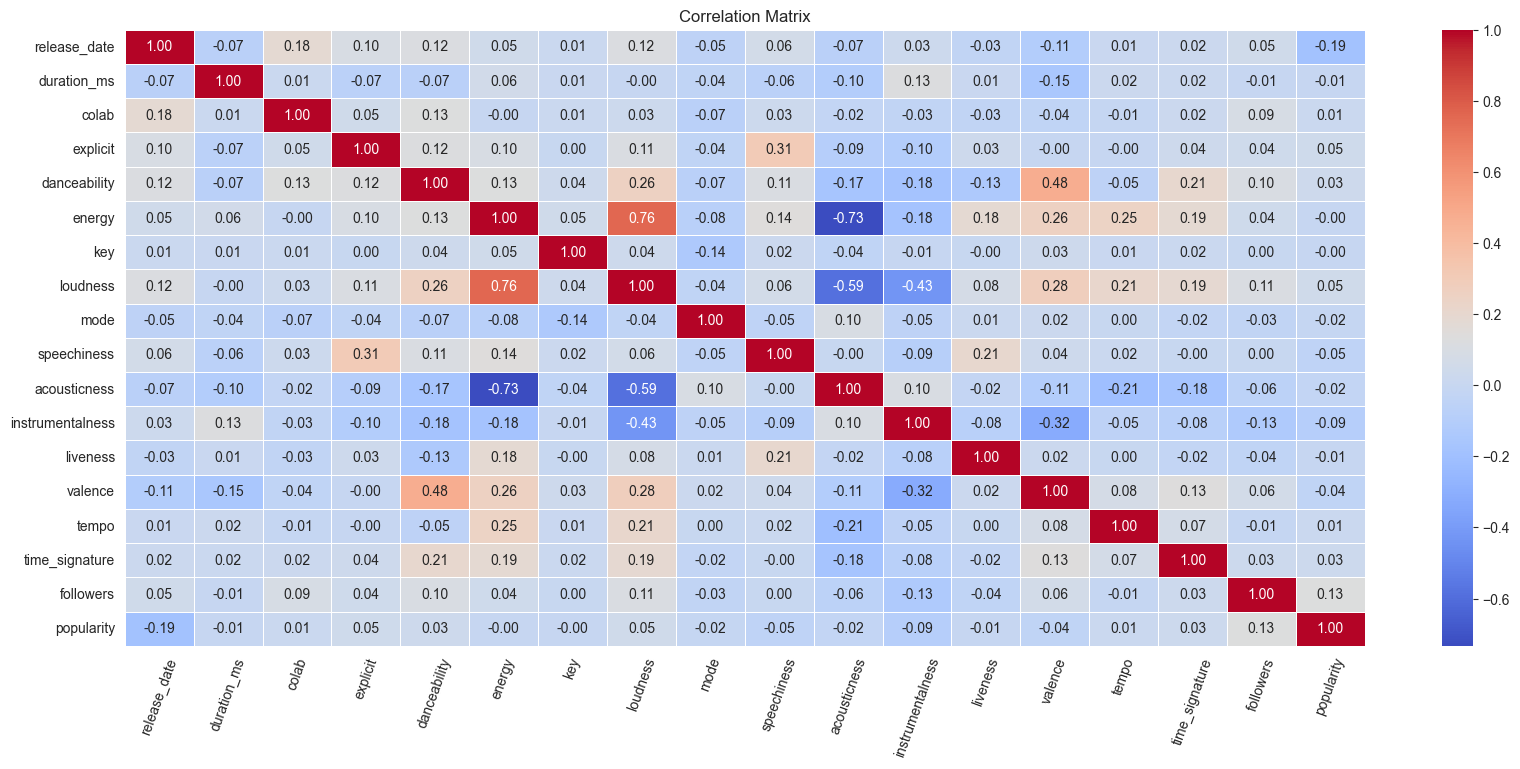

In [74]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=70)
plt.show();

<div class="alert alert-danger">

En la matriz de correlación se puede ver como en principio no existe correlación fuerte entre ninguna variable con el label 'popularity', lo cual nos indica que, en primer lugar, Spotify no favorece canciones en función de sus características abstractas, como energía, valence (felicidad), danzabilidad, etc. También puede interpretarse que es el público el que no tiene ninguna preferencia concreta por el estilo de las canciones, aunque esto es poco probable. Por último, no se debe descartar que el dataset no contenga datos bien espaciados y repartidos.

</div>

Por otro lado, calculo la correlación del 'track_genre' con el resto de columnas utilizando la librería dython, la cual permite analizar correlaciones entre features categóricos y contínuos.

Debido a la enorme carga que requiere el cálculo bruto directo de las correlaciones con todas las columnas, separo mediante un for para calcular una por una:

In [4]:
# Hago una copia para trabajar sin modificar el último dataframe:

tracks_total_filtrado_aux = tracks_total_filtrado.copy()

In [5]:
# Para poder calcular la correlación con el release_date mediante la librería Dython no puede éste ser de formato datetime.tracks_total_filtrado
# Genero una nueva columna donde release date pasa a ser numérica, contada como los días pasados desde el release_date más antiguo:

tracks_total_filtrado_aux['release_date_num'] = (tracks_total_filtrado['release_date'] - tracks_total_filtrado['release_date'].min()).dt.days
tracks_total_filtrado_aux.drop('release_date', axis=1, inplace=True)
tracks_total_filtrado_aux['release_date_num']

0         44658
1         44315
2         44271
3         43321
4         42768
          ...  
113210    43159
113211    43159
113212    36086
113213    33603
113214    33897
Name: release_date_num, Length: 113215, dtype: int64

In [6]:
from dython.nominal import associations

genre_corr = []
correlated_features = []

for feature in [col for col in tracks_total_filtrado_aux.columns if col != 'track_genre']:
    associations_df = associations(tracks_total_filtrado_aux[['track_genre', feature]], nominal_columns='all', plot=False)
    corr_matrix = associations_df['corr']

    genre_corr.append(corr_matrix.iloc[1]['track_genre'])
    correlated_features.append(feature)
    
    print(f"La correlación entre {color.BOLD}'track_genre' y '{feature}'{color.END} es: {color.BLUE}{corr_matrix.iloc[1]['track_genre']}{color.END}")
    plt.close('all')

La correlación entre 'track_genre' y 'artists' es: 0.6908888723780071
La correlación entre 'track_genre' y 'track_name' es: 0.2645602735978658
La correlación entre 'track_genre' y 'album_name' es: 0.5274131161282428
La correlación entre 'track_genre' y 'duration_ms' es: 0.22802232790808125
La correlación entre 'track_genre' y 'colab' es: 0.46454116444612603
La correlación entre 'track_genre' y 'explicit' es: 0.4010670589865583
La correlación entre 'track_genre' y 'danceability' es: 0.10667636081686077
La correlación entre 'track_genre' y 'energy' es: 0.1150588167730632
La correlación entre 'track_genre' y 'key' es: 0.07956453658125225
La correlación entre 'track_genre' y 'loudness' es: 0.17442702497493368
La correlación entre 'track_genre' y 'mode' es: 0.2494786611289295
La correlación entre 'track_genre' y 'speechiness' es: 0.11829624531417123
La correlación entre 'track_genre' y 'acousticness' es: 0.14436711519072531
La correlación entre 'track_genre' y 'instrumentalness' es: 0.12567

In [66]:
# Redimensionar como matriz 2D para el formato heatmap

corr_values_2d = np.array(genre_corr).reshape(1, -1)  # Convertir a matriz de 1 fila

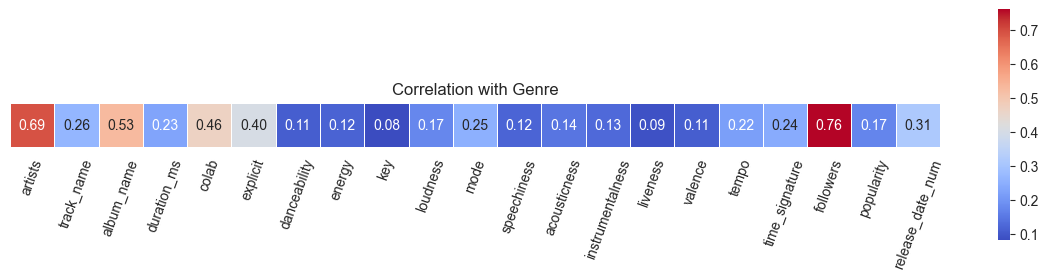

In [70]:
plt.figure(figsize=(15, 3))
sns.heatmap(corr_values_2d, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True, xticklabels=correlated_features, yticklabels="")
plt.xticks(rotation=70)
plt.title('Correlation with Genre')
plt.show();

<div class="alert alert-success">

El feature 'track_genre' sí muestra correlaciones más grandes con el resto de features. Indicar en primer lugar, que la escala mostrada es entre 0 y 1, dado que al tratarse de una variable categórica, los valores negativos no representarían lo mismo que entre numéricas, es decir, no puede crecer o disminuir.

La correlaciones mayores se dan con los features 'followers' y 'artists'. El último tiene sentido pues cada artista tiene un género determinado. En cuanto a los followers, tomando éste como una medida auxiliar del éxito de un artista en Spotify (no de sus lanzamientos persé sino de su carrera en la plataforma), es un buen indicativo de la influencia del género de la música en el éxito del artista.

</div>

Anazizo a continuación esa relación entre 'track_genre' y 'followers'.

### ¿Es followers una buena métrica de éxito?

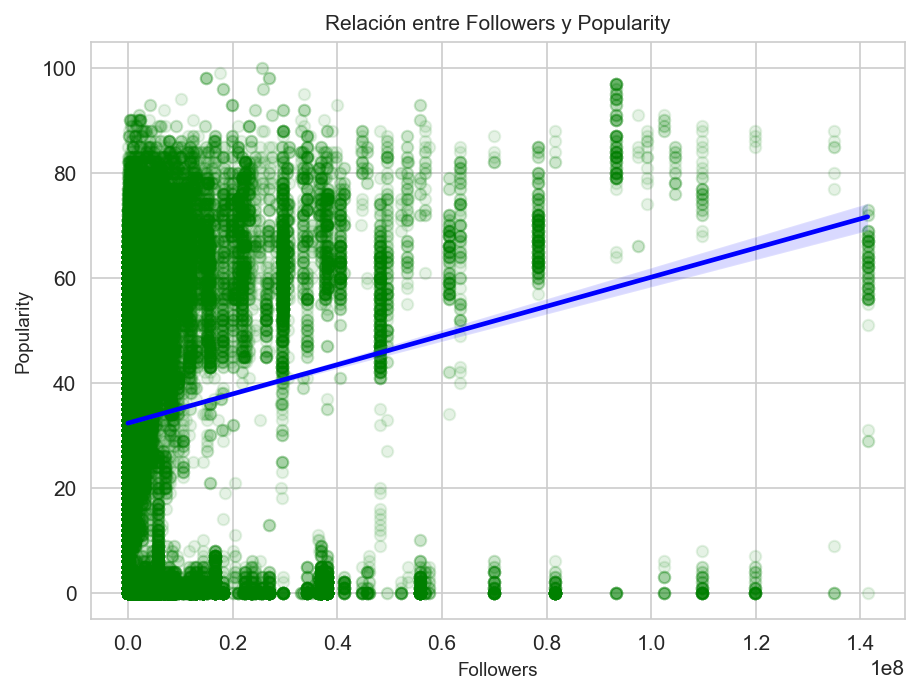

In [ ]:
plt.figure(figsize=(7, 5), dpi=150)
sns.regplot(x=tracks_total_filtrado['followers'], y=tracks_total_filtrado['popularity'], 
            scatter_kws={"s": 30, "alpha": 0.1, "color": "green"}, line_kws={"color": "blue"})

plt.xlabel("Followers", fontsize=9)
plt.ylabel("Popularity", fontsize=9)
plt.title("Relación entre Followers y Popularity", fontsize=10)
plt.show()

Calculo la correlación de Spearman entre 'followers' y 'popularity', dado que, basándome en la gráfica anterior y en consonancia con la correlación de de Pearson **_*(0.13)*_**, no se percibe una relación lineal entre las variables.

In [31]:
calculate_spearman(np.array(tracks_total_filtrado['followers']), np.array(tracks_total_filtrado['popularity']))

Correlación de Spearman: 0.201
Valor p: 0.000


<div class="alert alert-warning">

0.203 sugiere que hay una tendencia creciente, pero es débil (una variable no predice bien la otra).

Valor p = 0.000 indica que la correlación es estadísticamente significativa (p < 0.05), es decir, es poco probable que haya surgido por azar.

Es decir, a pesar de mi sesgo para creer que el crecimiento de popularidad estaba directamente relacionado o causaba un aumento de seguidores en el artista, según los datos contenidos en este dataset no existe una relación tan significativa, aunque no es una hipótesis totalmente rechazada.

Por lo tanto, considerando que 'popularity' es la variable directamente generada por Spotify para medir el éxito de un tema, no sería conveniente utilizar la variable 'followers' como medida de éxito.

</div>

Resta comprobar la calidad de los datos 'popularity':

In [32]:
tracks_total_filtrado['popularity'].value_counts()

popularity
0      15774
22      2346
21      2331
44      2278
1       2113
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

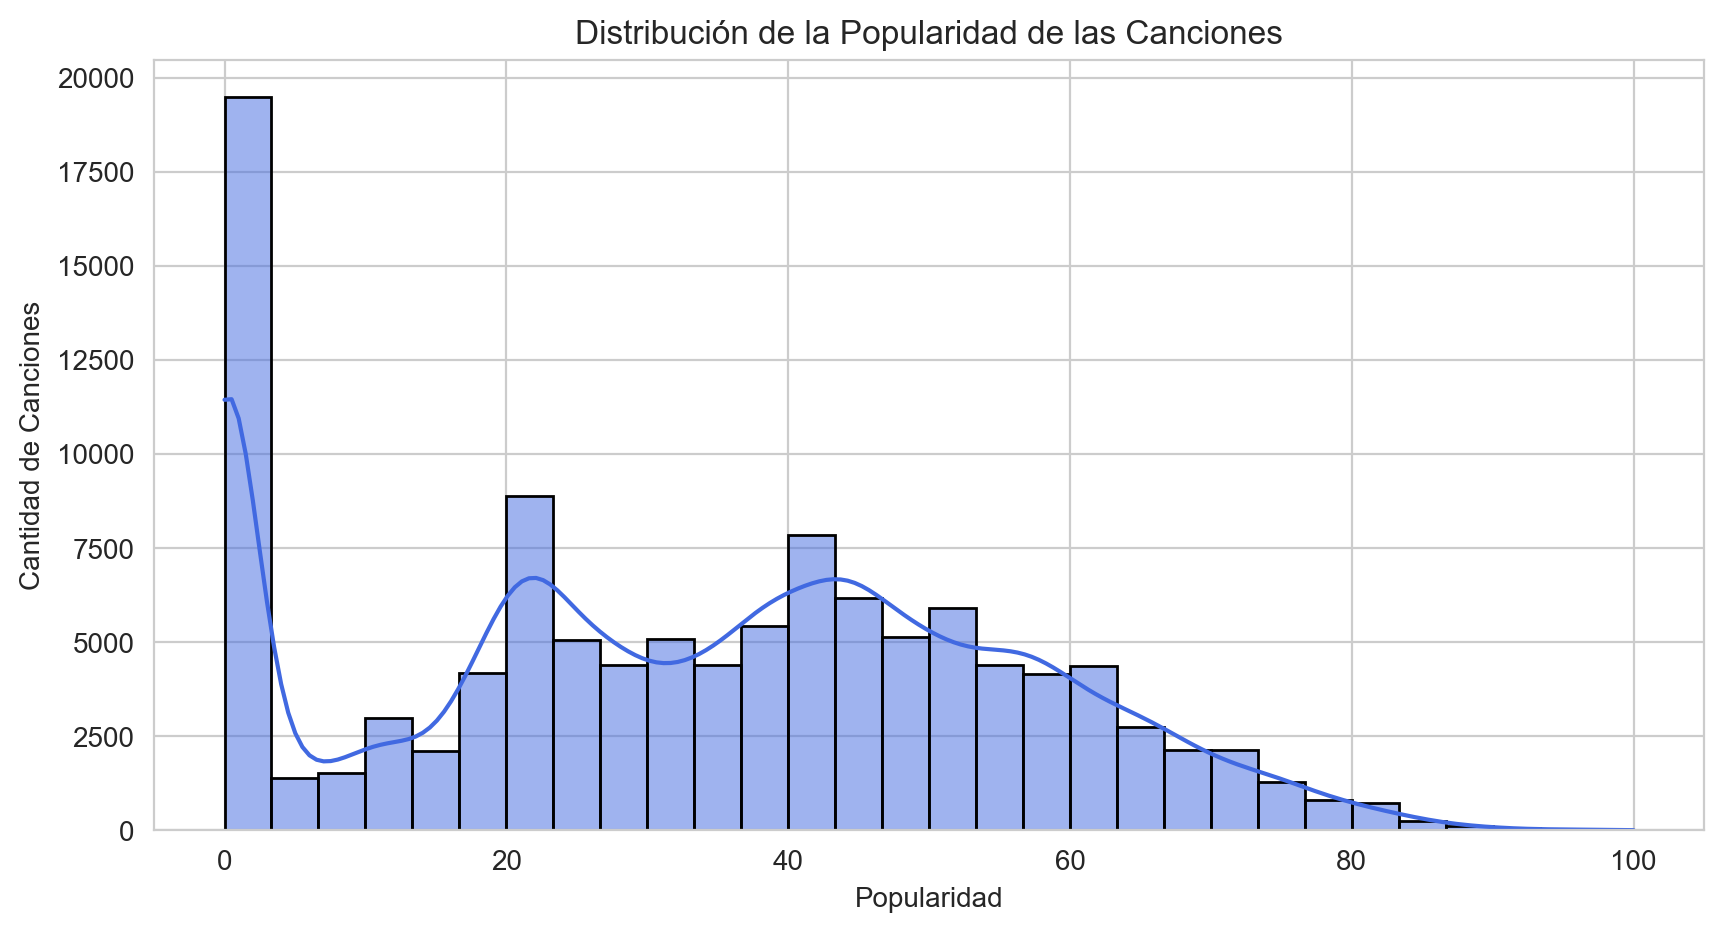

In [35]:
plt.figure(figsize=(10, 5), dpi=200)
sns.histplot(tracks_total_filtrado['popularity'], bins=30, kde=True, color="royalblue", edgecolor='black')

plt.xlabel("Popularidad")
plt.ylabel("Cantidad de Canciones")
plt.title("Distribución de la Popularidad de las Canciones")
plt.show()

<div class="alert alert-warning">

La distribución de la popularidad de las canciones en el dataset muestra un despunte en las marcadas con valor 0. Puede ser representativo debido a que a Spotify se suben numerosas canciones que no alcanzan a público o puede ser por un desequilibrio en el dataset.

</div>

### Géneros más populares

In [14]:
# Hago una copia para trabajar sin modificar el último dataframe:

tracks_total_filtrado_aux = tracks_total_filtrado.copy()

Para poder analizar los géneros más populares, en primer lugar voy a reducir el número de géneros, muy específicos en el dataframe original, a una serie de géneros más genéricos:

In [15]:
print(f"Cantidad de géneros presentes en 'track_genre': {color.BLUE}{tracks_total_filtrado_aux['track_genre'].nunique()}{color.END}")
tracks_total_filtrado_aux['track_genre'].unique()

Cantidad de géneros presentes en 'track_genre': 114


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [16]:
reduced_genres = ['acoustic', 'afrobeat', 'alternative', 'ambient', 'anime', 'metal', 'bluegrass', 'blues', 'brazilian', 'breakbeat', 'british', 'cantopop', 'house', 'children', 'chill', 'classical', 'comedy', 'country', 'dance', 'disco', 'drum-and-bass', 'dub', 'electronic', 'emo', 'folk', 'funk', 'garage', 'gospel', 'goth', 'grunge', 'rock', 'hardcore', 'hip-hop', 'indie', 'industrial', 'jazz', 'k-pop', 'latin', 'mandopop', 'new-age', 'opera', 'pop', 'punk', 'r-n-b', 'reggae', 'reggaeton', 'romance', 'salsa', 'samba', 'ska', 'soul', 'synth-pop', 'tango', 'techno', 'trance', 'world']
print(len(reduced_genres))

56


In [17]:
# Genero un diccionario para mapear los géneros a géneros reducidos:

genre_map = {
    'black-metal': 'metal',
    'death-metal': 'metal',
    'grindcore': 'metal',
    'heavy-metal': 'metal',
    'metalcore': 'metal',
    'hard-rock': 'rock',
    'punk-rock': 'punk',
    'psych-rock': 'rock',
    'rock-n-roll': 'rock',
    'rockabilly': 'rock',
    'alt-rock': 'alternative',
    'indie-rock': 'indie',
    'indie-pop': 'indie',
    'j-rock': 'jazz',
    'j-dance': 'j-pop',
    'j-idol': 'j-pop',
    'british': 'rock',
    'german': 'electronic',
    'swedish': 'pop',
    'mandopop': 'pop',
    'cantopop': 'pop',
    'pop-film': 'pop',
    'power-pop': 'pop',
    'singer-songwriter': 'folk',
    'songwriter': 'folk',
    'r-n-b': 'rnb',
    'synthwave': 'electronic',
    'hardstyle': 'electronic',
    'progressive-house': 'house',
    'deep-house': 'house',
    'minimal-techno': 'techno',
    'detroit-techno': 'techno',
    'chicago-house': 'house',
    'edm': 'electronic',
    'electro': 'electronic',
    'idm': 'electronic',
    'trip-hop': 'electronic',
    'club': 'dance',
    'party': 'dance',
    'show-tunes': 'musical',
    'opera': 'classical',
    'piano': 'classical',
    'new-age': 'ambient',
    'study': 'ambient',
    'sleep': 'ambient',
    'happy': 'pop',
    'sad': 'pop',
    'romance': 'pop',
    'children': 'kids',
    'kids': 'kids',
    'disney': 'kids',
    'anime': 'j-pop',
    'latin': 'latino',
    'mpb': 'brazilian',
    'forro': 'brazilian',
    'pagode': 'brazilian',
    'sertanejo': 'brazilian',
    'turkish': 'world',
    'iranian': 'world',
    'malay': 'world',
    'french': 'world',
    'spanish': 'world',
    'brazil': 'brazilian'
}


In [18]:
tracks_total_filtrado_aux['track_genre'].replace(genre_map, inplace=True)
tracks_total_filtrado_aux['track_genre'].value_counts()

C:\Users\defco\AppData\Local\Temp\ipykernel_15284\1955547989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tracks_total_filtrado_aux['track_genre'].replace(genre_map, inplace=True)


track_genre
pop              8782
electronic       6936
metal            5990
rock             5983
brazilian        4996
world            4977
house            3992
ambient          3990
j-pop            3989
techno           2996
kids             2988
dance            2952
folk             2950
classical        2916
jazz             1999
punk             1998
alternative      1998
latino           1983
indie            1968
industrial       1000
emo              1000
acoustic         1000
reggaeton        1000
tango            1000
ska              1000
samba            1000
reggae           1000
synth-pop         999
hardcore          999
dancehall         999
trance            999
grunge            999
gospel            999
garage            999
chill             999
afrobeat          999
bluegrass         998
world-music       998
goth              998
dub               998
breakbeat         998
dubstep           998
groove            998
funk              998
guitar            99

In [19]:
most_popular_genres_popularity = tracks_total_filtrado_aux.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)[:15]

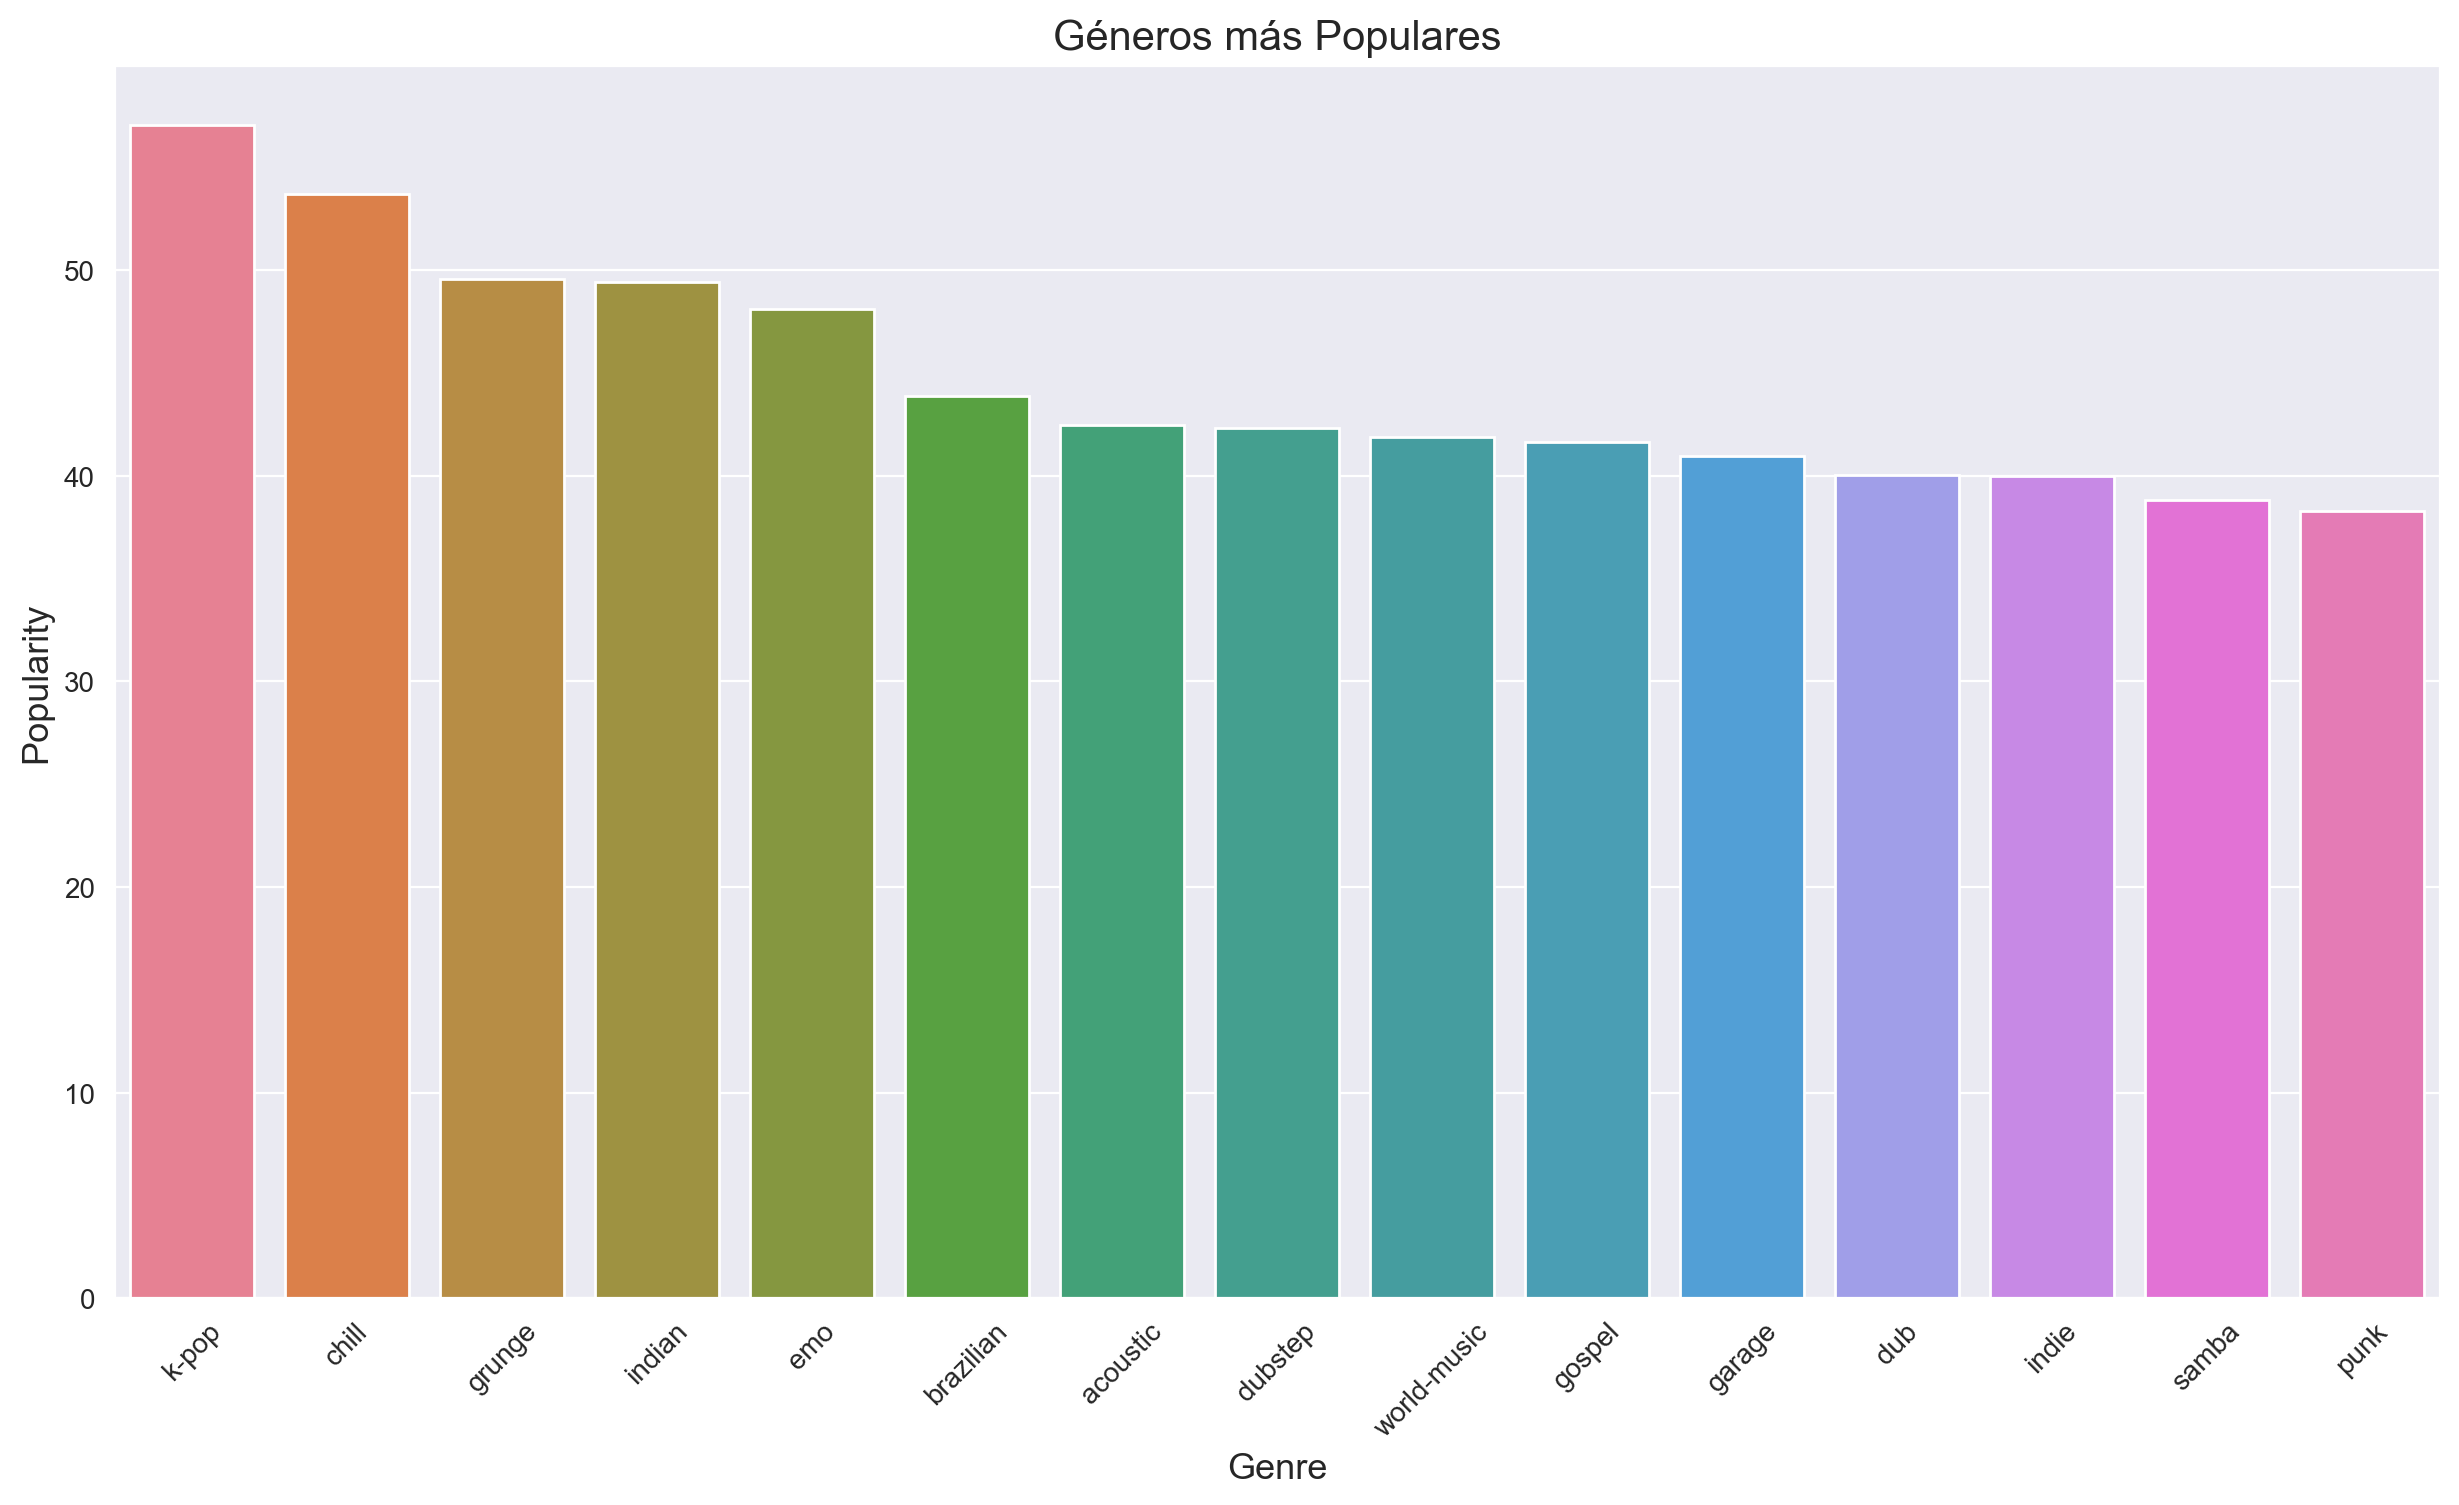

In [117]:
plt.figure(figsize=(15, 8), dpi=200)
sns.barplot(x=most_popular_genres_popularity.index, y=most_popular_genres_popularity, hue=most_popular_genres_popularity.index, legend=False)
plt.title("Géneros más Populares", fontsize=15)
plt.xlabel("Genre", fontsize=13)
plt.ylabel("Popularity", fontsize=13)
plt.xticks(rotation=45); 

<div class="alert alert-success">

La gráfica anterior confirma que el género parece influir en la popularidad de las canciones. En cuanto a la popularidad media de las canciones de cada género, pueden producir sorpresa en ciertos casos debido a los sesgos de ideas preconcebidas, pero se trata de datos reales de Spotify tomados en 2023.

Como referencia, aunque no hay información muy específica, así es como se cree que se calcula la popularidad:

**Para canciones**

- Basado en el número total de reproducciones recientes.

- Considera la frecuencia de reproducción en los últimos días.

- Se ajusta según la cantidad total de streams en Spotify.

- No se basa solo en reproducciones históricas; la reciente actividad importa más.

- No afecta si la canción se reproduce en modo privado.

</div>

### ¿Influye el género en el éxito de un lanzamiento?

In [118]:
tracks_total_filtrado_aux2 = tracks_total_filtrado_aux.copy()

In [119]:
tracks_total_filtrado_aux2['track_genre'].value_counts()

track_genre
pop              8782
electronic       6936
metal            5990
rock             5983
brazilian        4996
world            4977
house            3992
ambient          3990
j-pop            3989
techno           2996
kids             2988
dance            2952
folk             2950
classical        2916
jazz             1999
punk             1998
alternative      1998
latino           1983
indie            1968
industrial       1000
emo              1000
acoustic         1000
reggaeton        1000
tango            1000
ska              1000
samba            1000
reggae           1000
synth-pop         999
hardcore          999
dancehall         999
trance            999
grunge            999
gospel            999
garage            999
chill             999
afrobeat          999
bluegrass         998
world-music       998
goth              998
dub               998
breakbeat         998
dubstep           998
groove            998
funk              998
guitar            99

Reduzco los géneros a los 15 más populares de media:

In [120]:
tracks_total_filtrado_aux2[~tracks_total_filtrado_aux2['track_genre'].isin(most_popular_genres_popularity.keys())]['track_genre'].unique()

array(['afrobeat', 'alternative', 'ambient', 'j-pop', 'metal',
       'bluegrass', 'blues', 'breakbeat', 'rock', 'pop', 'house', 'kids',
       'classical', 'dance', 'comedy', 'country', 'dancehall', 'techno',
       'disco', 'drum-and-bass', 'electronic', 'folk', 'world', 'funk',
       'goth', 'groove', 'guitar', 'hardcore', 'hip-hop', 'honky-tonk',
       'industrial', 'jazz', 'latino', 'rnb', 'reggae', 'reggaeton',
       'salsa', 'musical', 'ska', 'soul', 'synth-pop', 'tango', 'trance'],
      dtype=object)

In [121]:
# Obtengo una lista de los géneros menos populares (del 15 en adelante)
other_genres = tracks_total_filtrado_aux[~tracks_total_filtrado_aux['track_genre'].isin(most_popular_genres_popularity.keys())]['track_genre'].unique()

# Los reemplazo por la categoría 'others'
tracks_total_filtrado_aux2['track_genre'].replace(list(other_genres), "others", inplace=True)
tracks_total_filtrado_aux2['track_genre'].unique()

C:\Users\defco\AppData\Local\Temp\ipykernel_35412\709062039.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tracks_total_filtrado_aux2['track_genre'].replace(list(other_genres), "others", inplace=True)


array(['acoustic', 'others', 'brazilian', 'chill', 'dub', 'dubstep',
       'emo', 'garage', 'gospel', 'grunge', 'indian', 'indie', 'k-pop',
       'punk', 'samba', 'world-music'], dtype=object)

In [98]:
# VER SI ESTA GRAFICA VALE

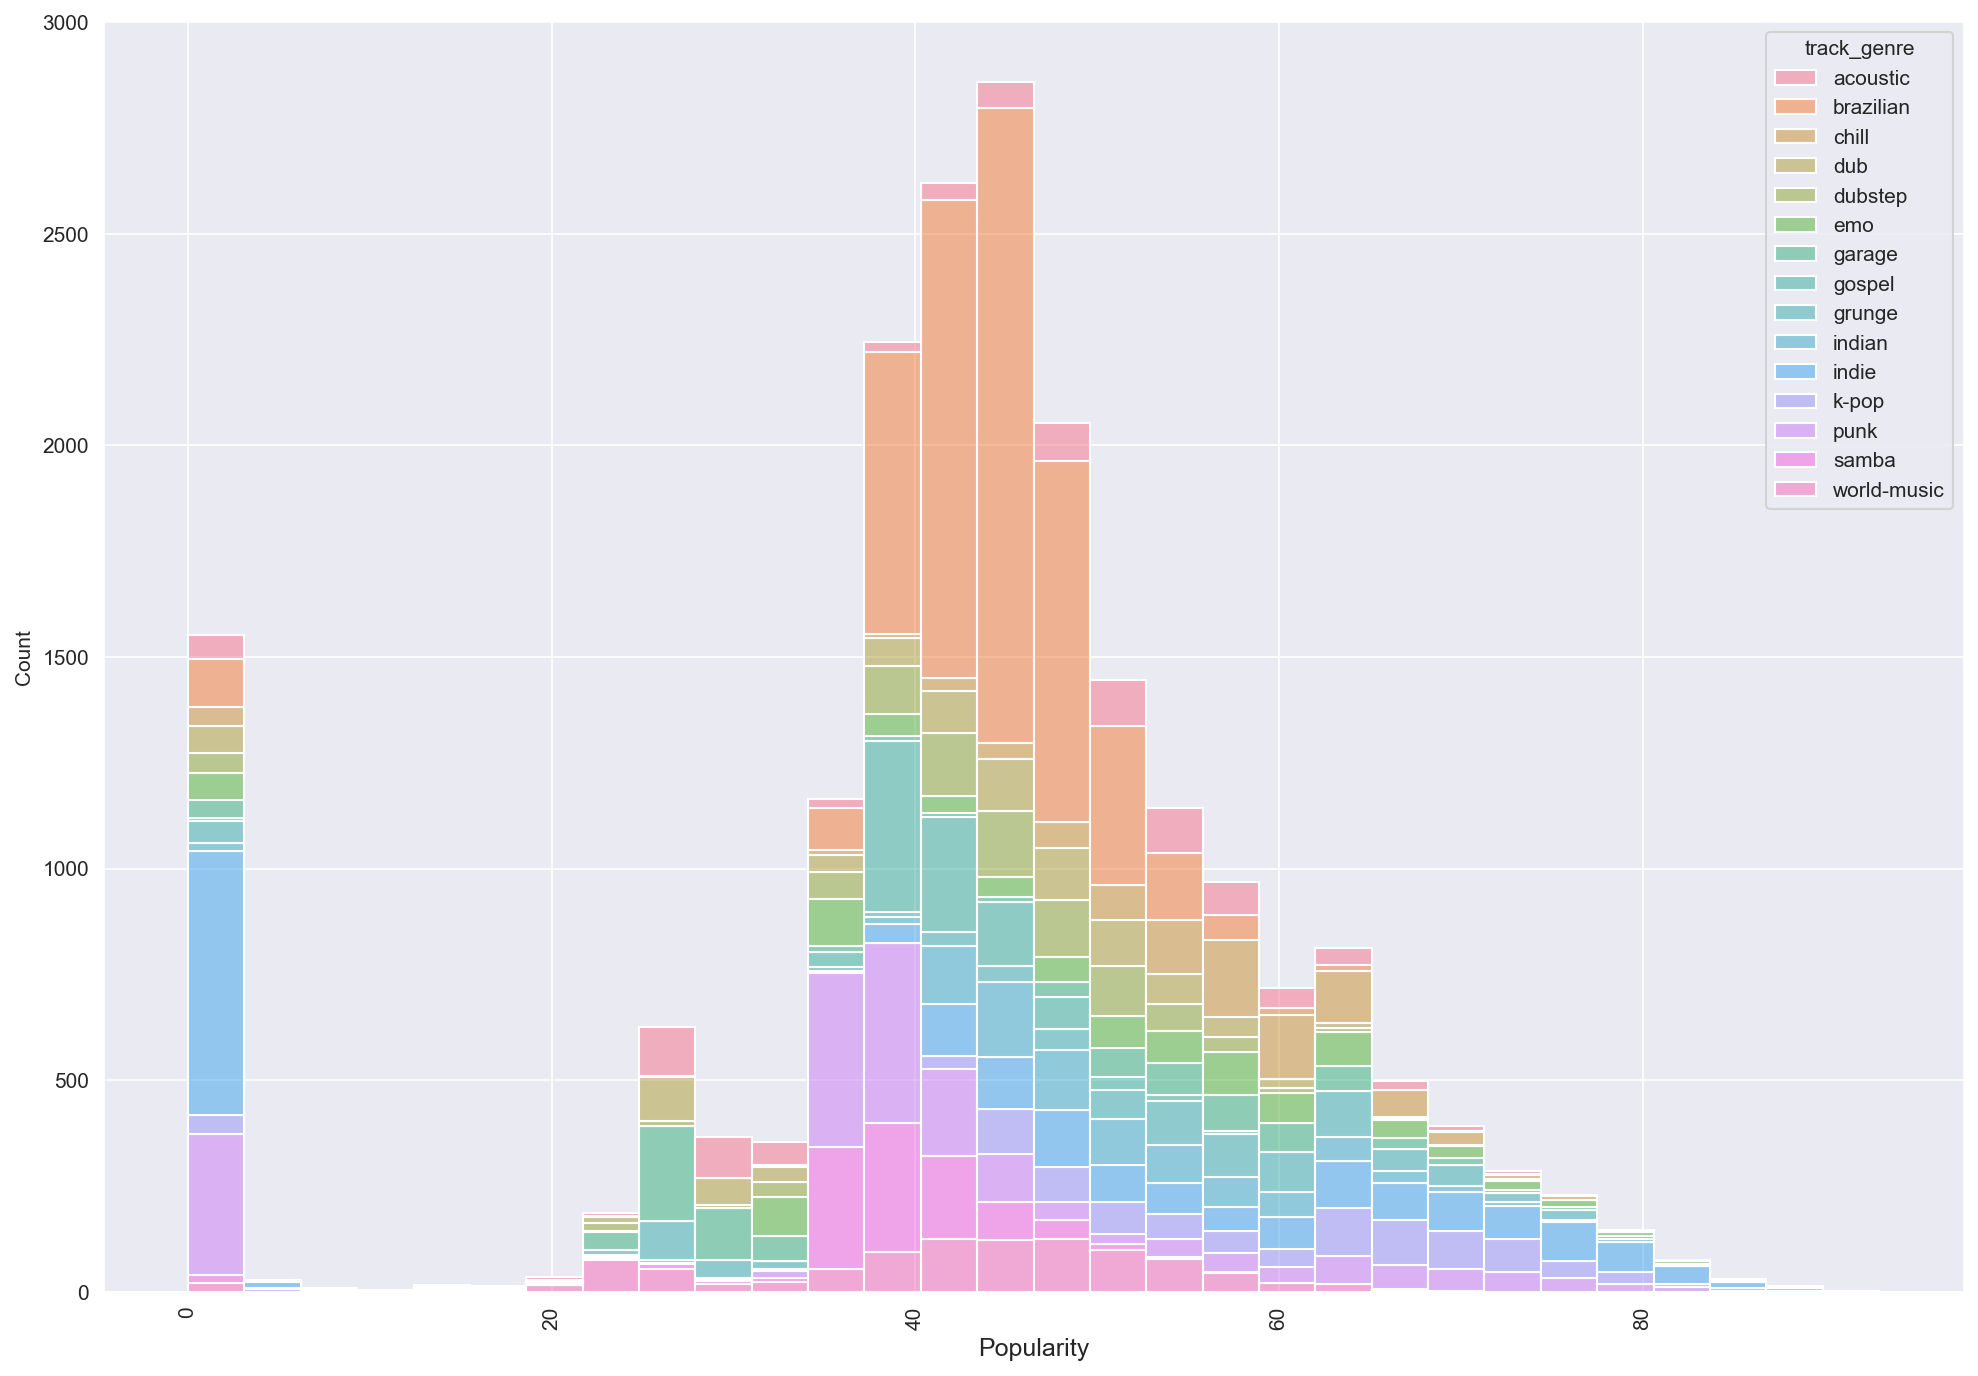

In [122]:
sns.set_style("darkgrid")

plt.figure(figsize=(16, 11), dpi=150)
sns.histplot(data=tracks_total_filtrado_aux2.loc[tracks_total_filtrado_aux2['track_genre'] != 'others'], x='popularity', 
             kde=False, bins=30, hue='track_genre', alpha=0.5, multiple='stack')

plt.xlabel("Popularity", fontsize=12)
plt.xticks(rotation=90);

C:\Users\defco\AppData\Local\Temp\ipykernel_35412\1589969440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tracks_total_filtrado_aux2.loc[tracks_total_filtrado_aux2['track_genre'] != 'others'],


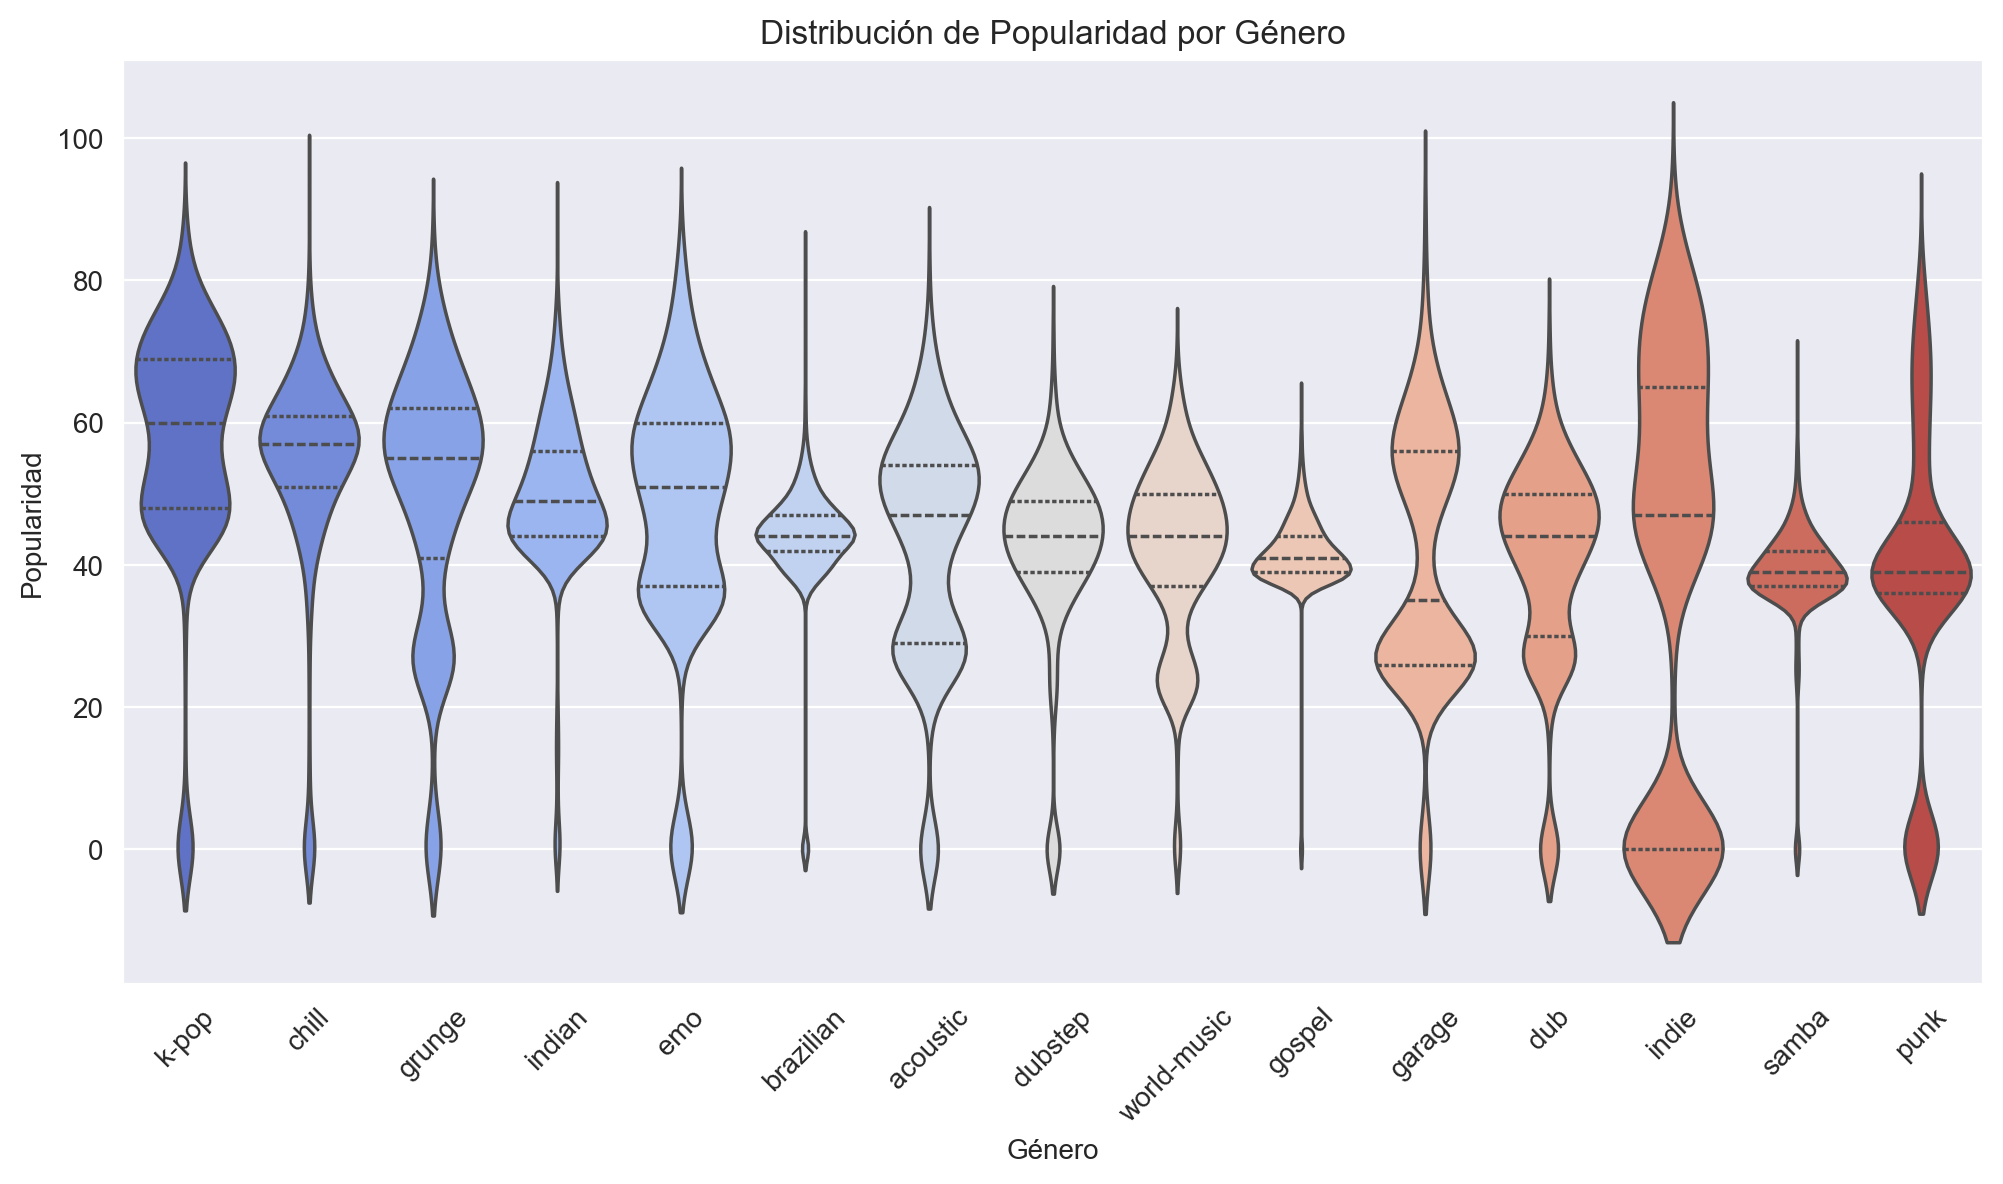

In [123]:
plt.figure(figsize=(12, 6), dpi=200)
sns.violinplot(data=tracks_total_filtrado_aux2.loc[tracks_total_filtrado_aux2['track_genre'] != 'others'], 
               x="track_genre", y="popularity", palette="coolwarm", inner="quartile", order=most_popular_genres_popularity.keys())

plt.xticks(rotation=45)
plt.xlabel("Género")
plt.ylabel("Popularidad")
plt.title("Distribución de Popularidad por Género")
plt.show()

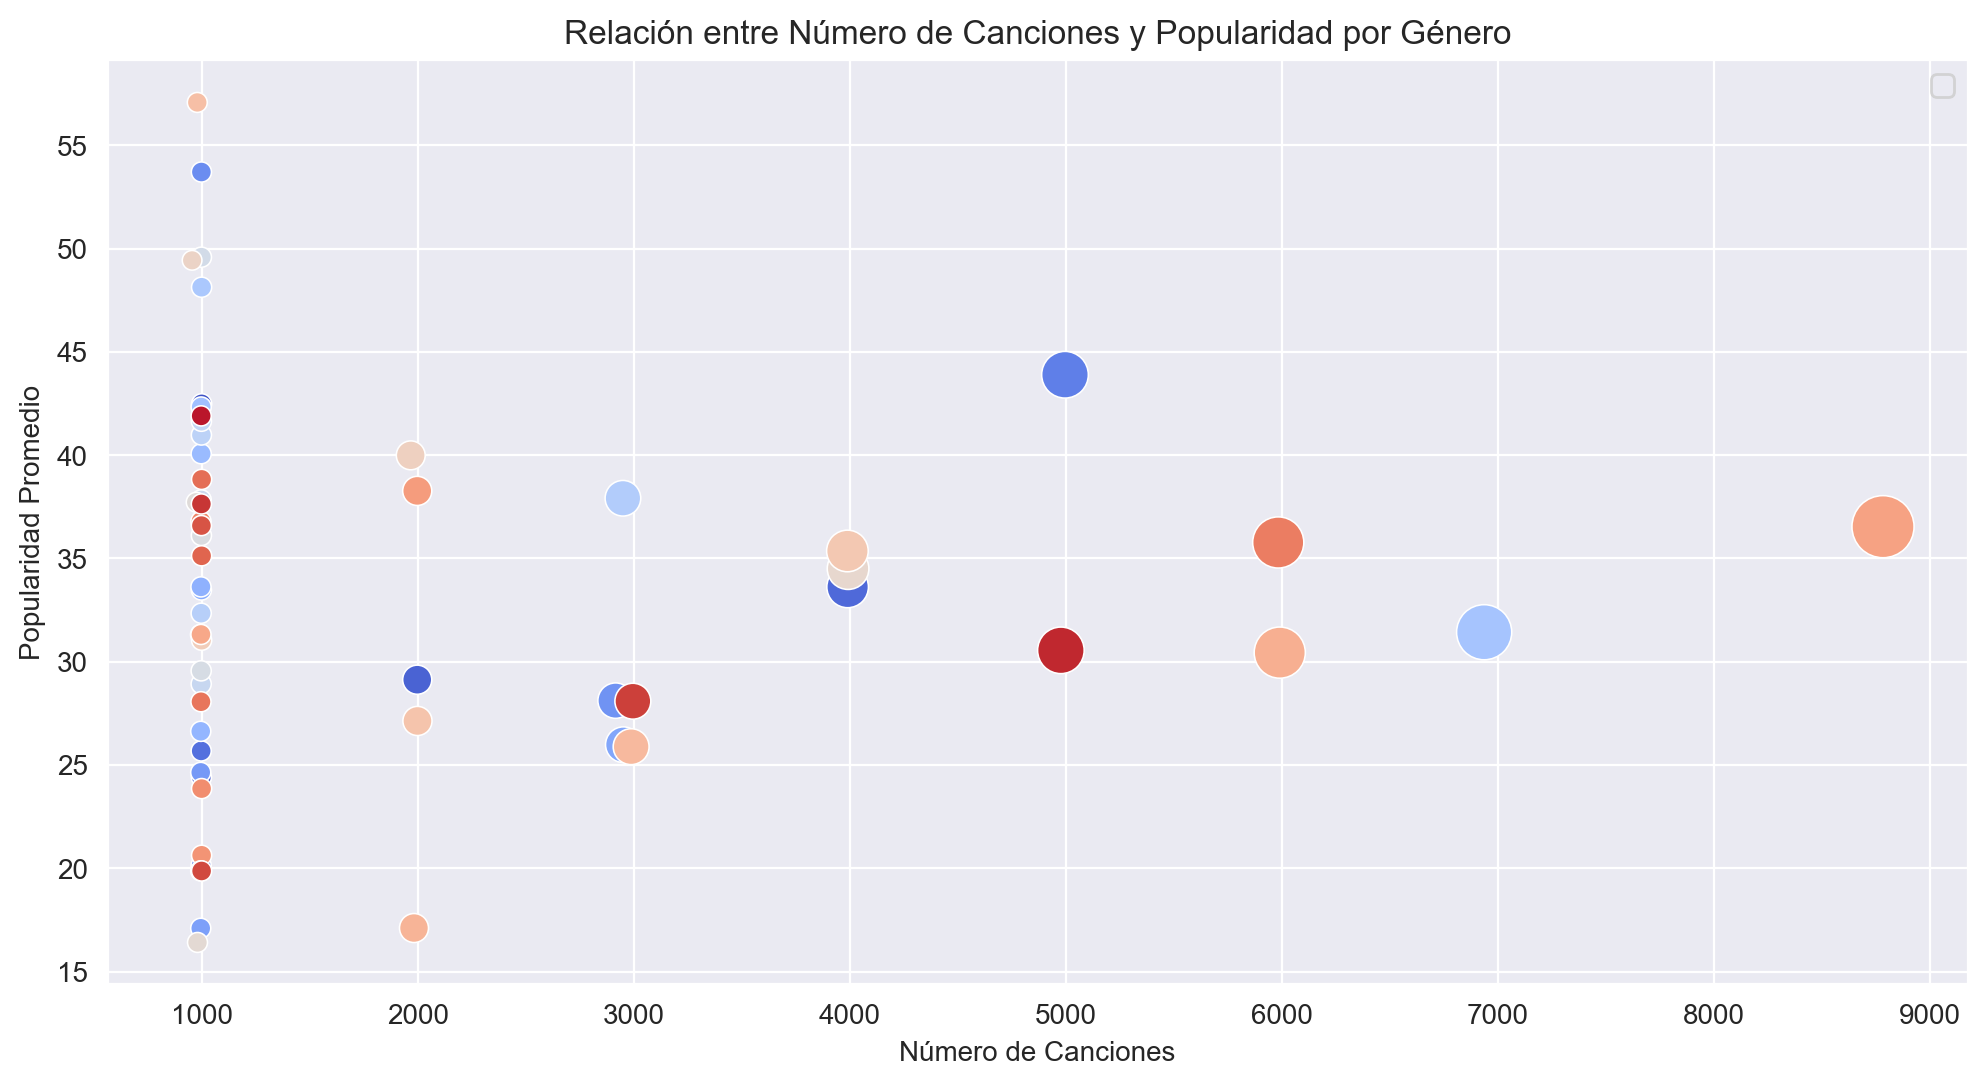

In [127]:
# Contar cuántas canciones hay por género
genre_counts = tracks_total_filtrado_aux.loc[tracks_total_filtrado_aux['track_genre'] != 'others']["track_genre"].value_counts()

# Calcular popularidad promedio
genre_popularity = tracks_total_filtrado_aux.loc[tracks_total_filtrado_aux['track_genre'] != 'others'].groupby("track_genre")["popularity"].mean()

genre_analysis = pd.DataFrame({"Num_Canciones": genre_counts, "Popularidad_Promedio": genre_popularity})

# Graficar
plt.figure(figsize=(12, 6), dpi=200)
ax = sns.scatterplot(data=genre_analysis, x="Num_Canciones", y="Popularidad_Promedio",
                     hue=genre_analysis.index, size="Num_Canciones",
                     palette="coolwarm", sizes=(50, 500))

# Obtener leyenda sin "track_genre"
handles, labels = ax.get_legend_handles_labels()
new_handles = handles[1:]  
new_labels = labels[1:] 

ax.legend(new_handles, new_labels, bbox_to_anchor=(1.05, 1), loc='upper left', title="Géneros", fontsize=10, title_fontsize=12)

plt.legend("")
plt.xlabel("Número de Canciones")
plt.ylabel("Popularidad Promedio")
plt.title("Relación entre Número de Canciones y Popularidad por Género")

plt.show()

<div class="alert alert-warning">

Preguntas clave para analizar el favoritismo de Spotify:

- ¿Los géneros más populares coinciden con los géneros con más canciones? 
    
    No coinciden.

- ¿Hay géneros con muchas canciones pero baja popularidad? ¿Por qué ocurre esto? 

    Sí los hay. Esto podría reflejar que el algoritmo no los promueve tanto o que el dataset está desbalanceado.

- ¿Existen géneros con pocas canciones que destacan en popularidad?

    Sí. Esto puede indicar que aunque no sean abundantes, cuando aparecen en Spotify suelen ser bien recibidos.

Spotify no favorece necesariamente a los géneros con más canciones, ya que la popularidad no siempre está ligada a la cantidad de temas disponibles. Existen géneros con una gran cantidad de canciones pero baja popularidad, lo que sugiere que el algoritmo podría no estar impulsándolos activamente o que el dataset tiene un sesgo. Por otro lado, algunos géneros con pocas canciones logran destacar en popularidad, lo que indica que, aunque no sean abundantes, son bien recibidos por los usuarios. Esto sugiere que el favoritismo de Spotify podría estar más relacionado con la demanda de los oyentes y la curaduría algorítmica que con la cantidad de contenido disponible por género.

</div>

### ¿Es relevante la fecha de lanzamiento de cara a su éxito?

In [7]:
tracks_total_filtrado_aux3 = tracks_total_filtrado.copy()

#### En primer lugar analizo los lanzamientos por meses:

In [150]:
tracks_total_filtrado_aux3['month'] = tracks_total_filtrado_aux3['release_date'].dt.month_name()  # Extraer el nombre del mes
tracks_total_filtrado_aux3['month']

0            April
1            April
2            March
3           August
4         February
            ...   
113995       March
113996       March
113997     October
113998     January
113999     October
Name: month, Length: 113215, dtype: object

In [151]:
# Contar lanzamientos por mes

monthly_counts = tracks_total_filtrado_aux3['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_counts

month
January      17618
February      6296
March         6593
April         6729
May           7055
June          7087
July          6956
August        6914
September     8702
October      27464
November      6816
December      4985
Name: count, dtype: int64

C:\Users\defco\AppData\Local\Temp\ipykernel_35412\1348822777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')


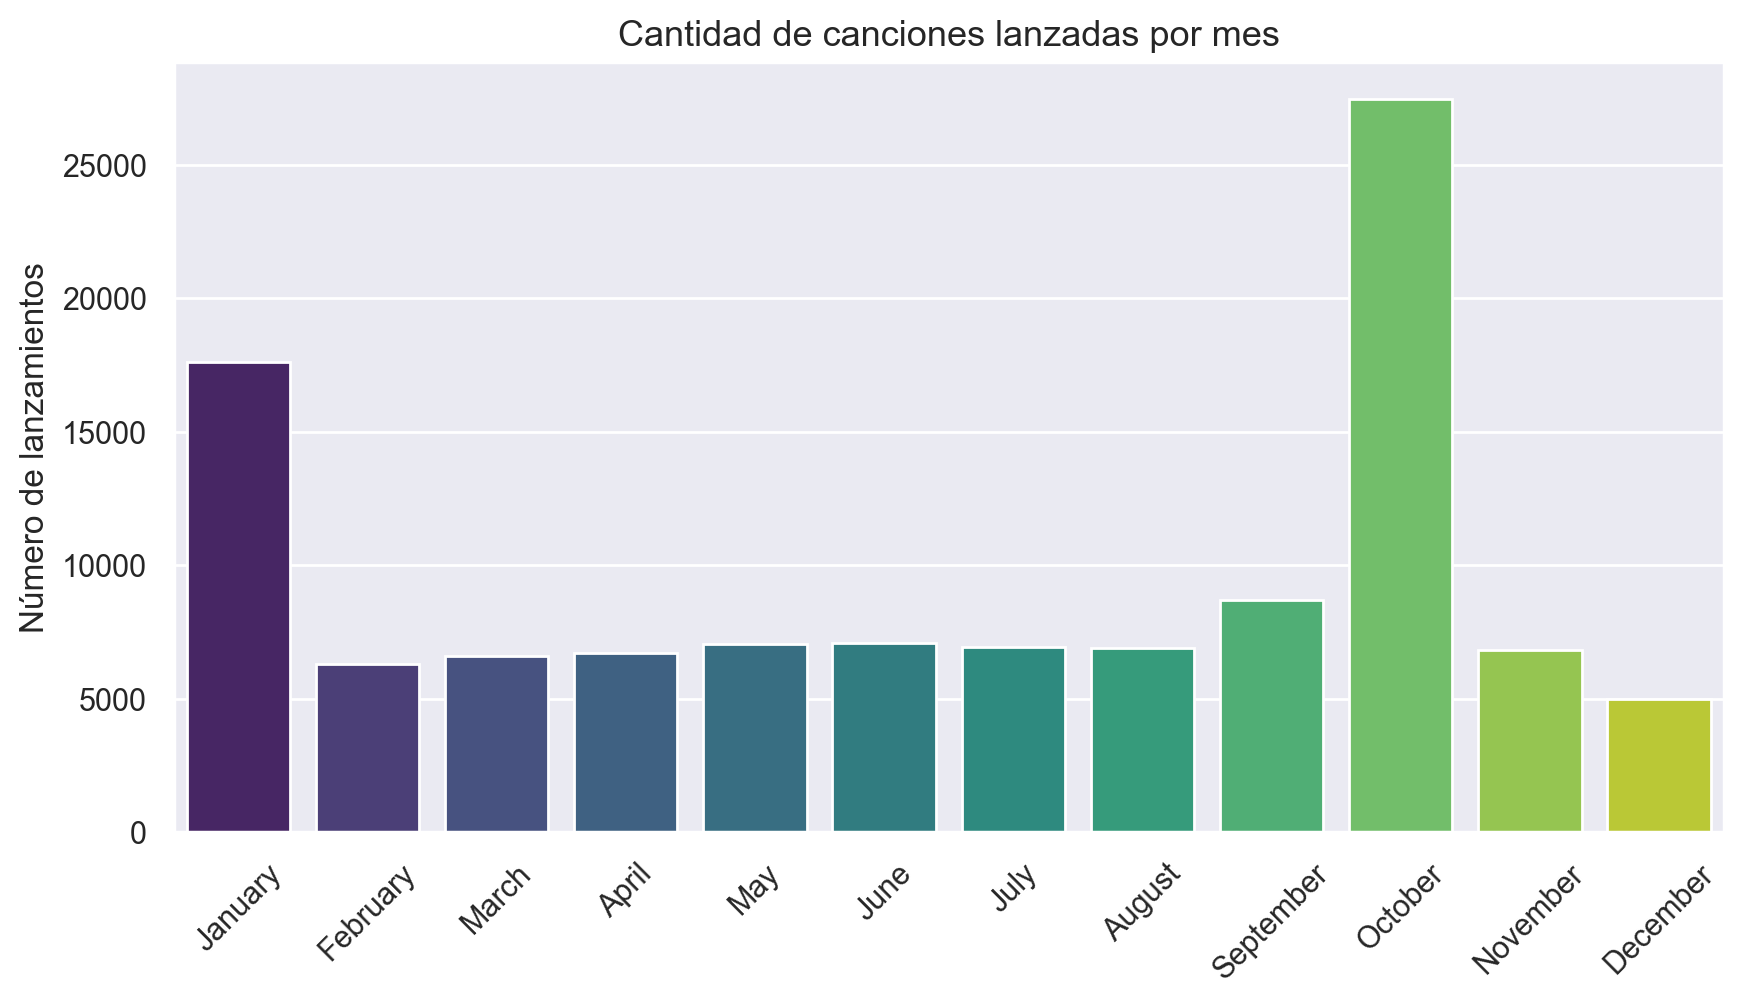

In [168]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.xticks(rotation=45, )
plt.xlabel("")
plt.ylabel("Número de lanzamientos")
plt.title("Cantidad de canciones lanzadas por mes", fontsize=13)
plt.show()

<div class="alert alert-warning">

Según los datos analizados, la mayoría de lanzamientos se producen, con diferencia en octubre.

Las expectativas iniciales son:

- Octubre - Noviembre: Muchas discográficas y artistas lanzan música en esta temporada para maximizar ventas en Navidad y Año Nuevo y para que las canciones sean elegibles para premios como los Grammy (celebrado en febrero). También, se lanzan álbumes estratégicamente antes de la temporada de listas de "Lo mejor del año". ☑

- Mayo - Junio: Es cuando empiezan a salir los "hits del verano", sobre todo en géneros como pop, reggaetón y electrónica.

- Enero - Febrero: Artistas independientes también aprovechan estos meses porque hay menos competencia con los grandes lanzamientos. ☑

- Diciembre: La industria musical cierra el año, por lo que los lanzamientos bajan significativamente. ☑

- Julio - Agosto: Aunque hay lanzamientos veraniegos, muchas discográficas esperan hasta septiembre para publicar álbumes completos.

La API puede sesgar los datos hacia canciones más populares o recientes y las fechas de lanzamiento pueden no ser precisas (algunas canciones pueden aparecer con la fecha del álbum en lugar de la fecha exacta de lanzamiento).

</div>

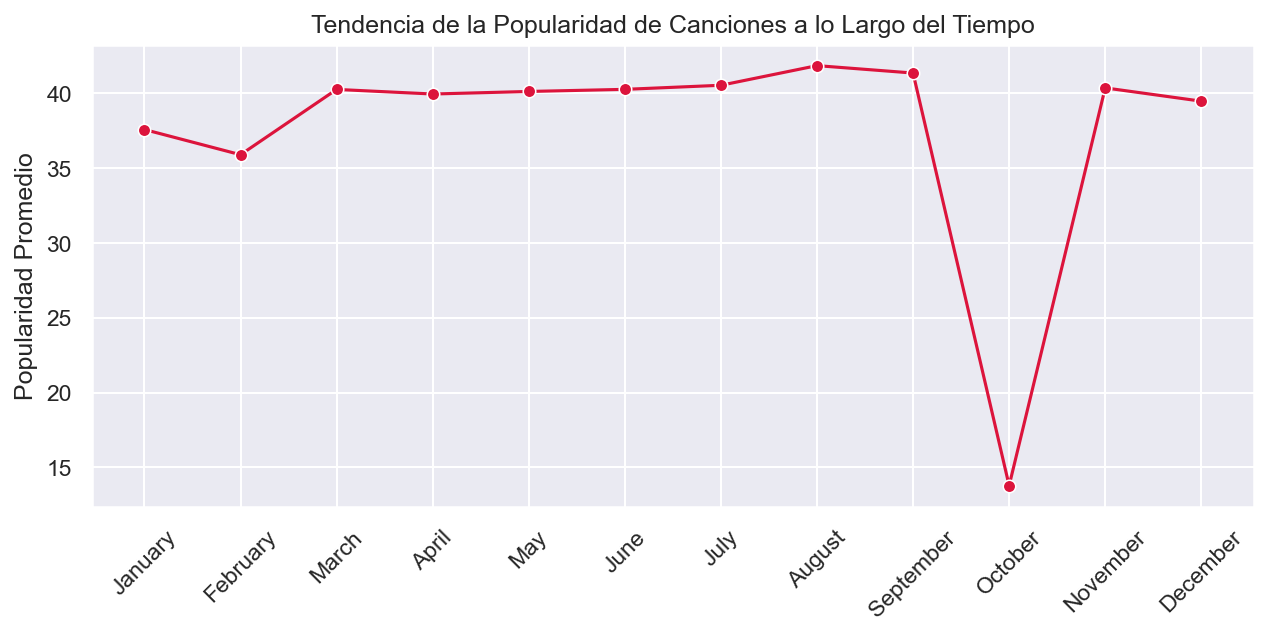

In [169]:
df_grouped = tracks_total_filtrado_aux3.groupby('month')['popularity'].mean().reset_index()

# Convertir a categoría ordenada
df_grouped["month"] = pd.Categorical(df_grouped["month"], categories=monthly_counts.keys(), ordered=True)

# Ordenar antes de graficar
df_grouped = df_grouped.sort_values("month")

plt.figure(figsize=(10, 4), dpi=150)
sns.lineplot(x=df_grouped['month'], y=df_grouped['popularity'], color="crimson", marker="o")

plt.xlabel("")
plt.ylabel("Popularidad Promedio")
plt.title("Tendencia de la Popularidad de Canciones a lo Largo del Tiempo")
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-warning">

Los resultados obtenidos en esta gráfica no resultan coherentes con lo observado en la anterior. Como decía en el análisis de la gráfica previa, los artistas y discográficas optan por lanzar en octubre pues es un mes en el que las probabilidades de éxito son mayores. Según la gráfica superior, es justo lo contrario.

Comentaba en la sección "¿Es followers una buena métrica de éxito?" que la distribución de la popularidad de las canciones en el dataset muestra un despunte en las marcadas con valor 0, y que esto podía ser representativo debido a que a Spotify se suben numerosas canciones que no alcanzan a público o, también por un sesgo en la toma de datos.

En cualquier caso, la existencia de esa gran cantidad de canciones lanzadas en octubre es lógica, pues si es cuando más música se lanza, es cuando más música no alcanzará audiencia y por tanto la media de popularidad caerá.

</div>

Vamos a comprobar en qué mes se lanzan más canciones populares. Para ello aplico un threshold en la columna 'popularity':

In [155]:
# Definir umbral de popularidad (ajústalo según el dataset)
popular_threshold = 70

df_summary = filter_popularity(tracks_total_filtrado_aux3, popular_threshold, "month", monthly_counts)
df_summary

month  popular_songs  total_songs  popular_percentage
4     January            735        17618            4.171870
3    February            254         6296            4.034307
7       March            288         6593            4.368269
0       April            347         6729            5.156784
8         May            442         7055            6.265060
6        June            429         7087            6.053337
5        July            385         6956            5.534790
1      August            412         6914            5.958924
11  September            459         8702            5.274650
10    October            449        27464            1.634867
9    November            410         6816            6.015258
2    December            210         4985            4.212638

C:\Users\defco\AppData\Local\Temp\ipykernel_35412\394124843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary["month"], y=df_summary["popular_songs"], palette="coolwarm")


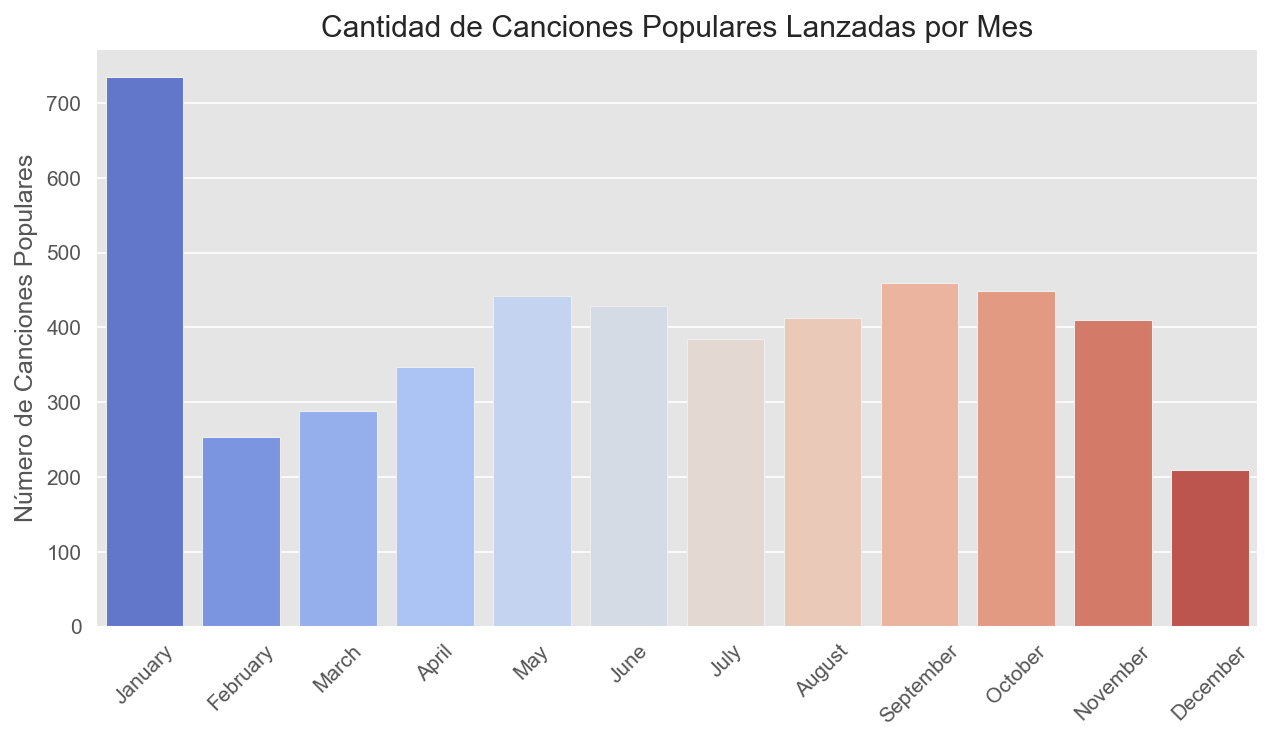

In [156]:
plt.figure(figsize=(10, 5), dpi=150)
sns.barplot(x=df_summary["month"], y=df_summary["popular_songs"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Número de Canciones Populares")
plt.title("Cantidad de Canciones Populares Lanzadas por Mes")
plt.show()

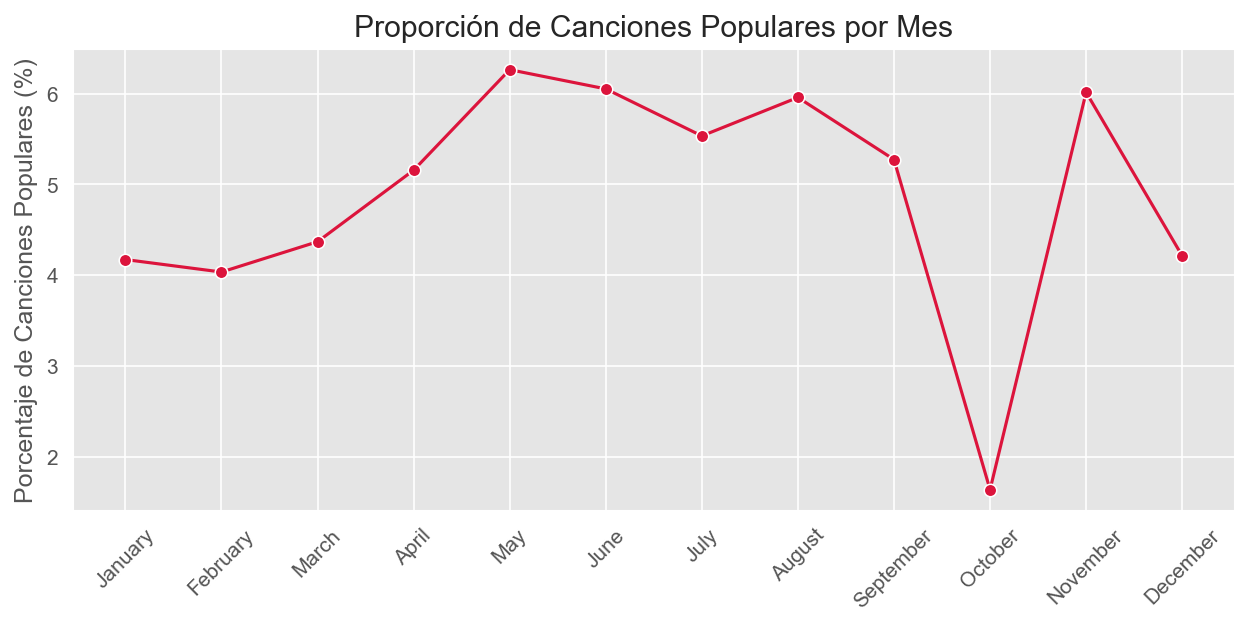

In [157]:
plt.figure(figsize=(10, 4), dpi=150)
sns.lineplot(x=df_summary["month"], y=df_summary["popular_percentage"], marker="o", color="crimson")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Porcentaje de Canciones Populares (%)")
plt.title("Proporción de Canciones Populares por Mes")
plt.grid(True)
plt.show()

<div class="alert alert-success">

De las dos gráficas anteriores concluímos:

- Se lanzan más canciones populares en enero (aunque el rango es corto, por lo que es propenso a sesgos en la toma de datos)
- Se lanzan menos canciones populares en diciembre, febrero y marzo
- El porcentaje de canciones populares en octubre es menor porque es el mes en que más canciones se lanzan, incluídas las menos populares

En conclusión, se puede inferir el éxito de una canción en función del mes de lanzamiento.

</div>

#### A continuación analizo los lanzamientos por día de la semana:

In [8]:
tracks_total_filtrado_aux3['day_of_week'] = tracks_total_filtrado_aux3['release_date'].dt.day_name()  # Extraer el nombre del mes
tracks_total_filtrado_aux3['day_of_week']

0            Friday
1            Friday
2         Wednesday
3            Friday
4            Friday
            ...    
113210     Thursday
113211     Thursday
113212       Monday
113213    Wednesday
113214    Wednesday
Name: day_of_week, Length: 113215, dtype: object

In [9]:
# Contar lanzamientos por mes
daily_counts = tracks_total_filtrado_aux3['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
daily_counts

day_of_week
Monday       12967
Tuesday      15347
Wednesday    13405
Thursday     11475
Friday       49666
Saturday      5526
Sunday        4829
Name: count, dtype: int64

C:\Users\defco\AppData\Local\Temp\ipykernel_6332\4004758148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')


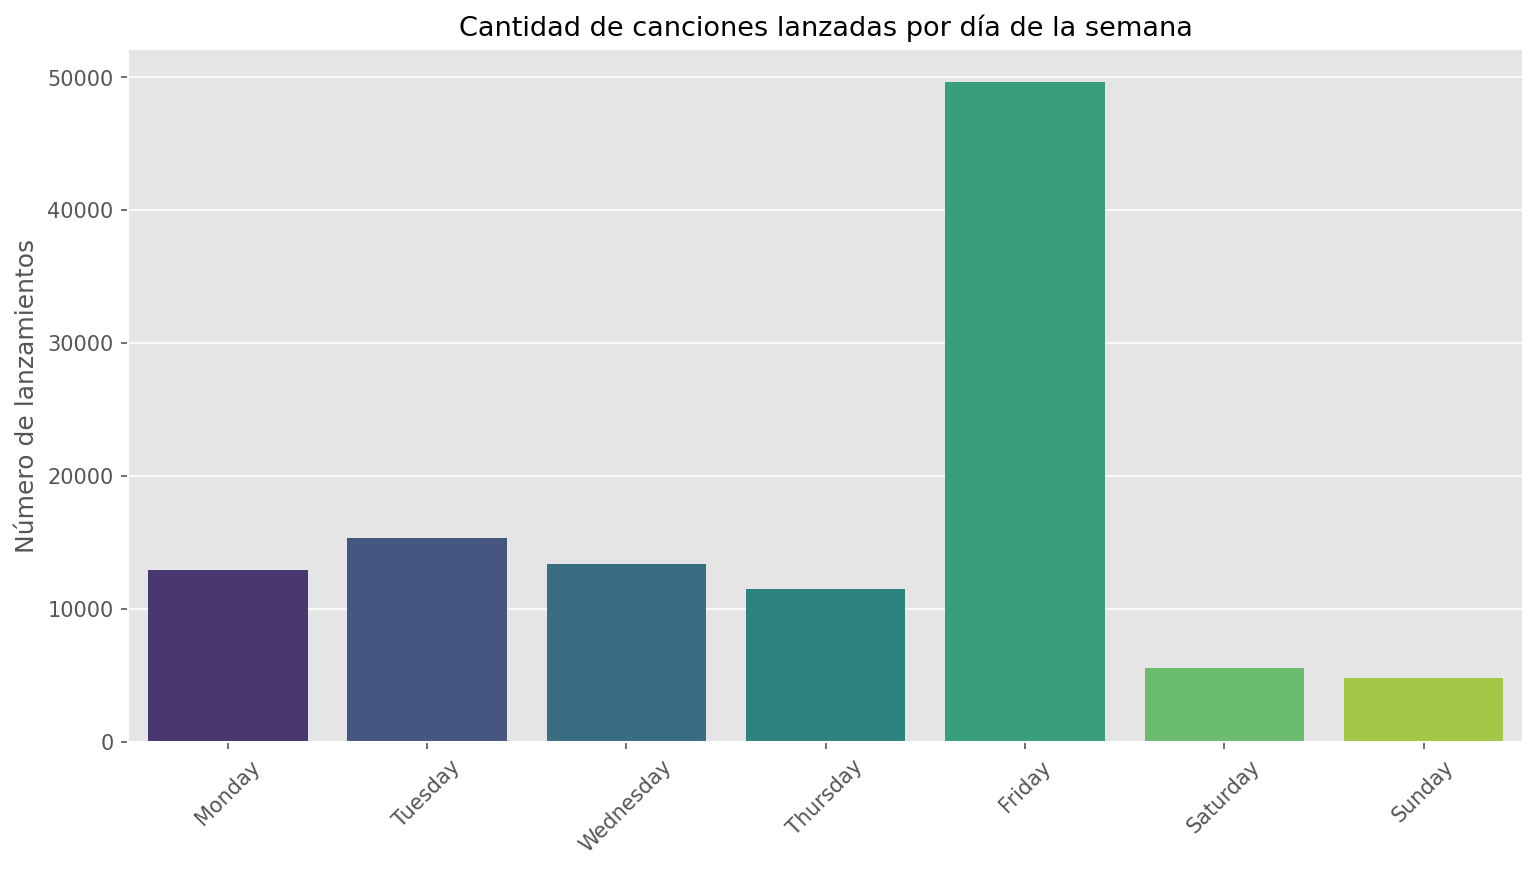

In [10]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Número de lanzamientos")
plt.title("Cantidad de canciones lanzadas por día de la semana", fontsize=13)
plt.show()

<div class="alert alert-success">

Cumple lo esperado. Es sabido que los lanzamientos en Spotify se hacen comunmente los viernes por diversas razones.

**1. El día de las listas de reproducción (Playlists)**

En Spotify, las listas de reproducción más importantes, como las que tienen más seguidores, se actualizan con los últimos lanzamientos tradicionalmente los viernes. Estas listas son una de las formas más poderosas de promover música, ya que atraen millones de oyentes. Si tu canción es lanzada el viernes, tiene una mayor posibilidad de ser incluida en estas listas.

**2. Más tráfico de usuarios**

Los usuarios de Spotify tienden a escuchar más música durante el fin de semana, especialmente los viernes por la tarde y noche. Además, el fin de semana es cuando más interacción activa hay en las redes sociales, aumentando las probabilidades de que tu música se comparta.

**3. Sincronización con otros lanzamientos**

Al ser un estandar actual de la industria, lanzar los viernes aumenta el interés del público por la plataforma y aumenta la visibilidad de los nuevos lanzamientos.

**4. Oportunidades para el algoritmo de recomendaciones**

Spotify utiliza algoritmos para recomendar música nueva a los oyentes. Al lanzar música el viernes, al tener más interacción durante los primeros días del lanzamiento (por ejemplo, el fin de semana), y tener el máximo de días posibles para que la canción sea escuchada antes del siguiente viernes, la probabilidad de que tu música sea promovida por el algoritmo de Spotify aumenta. Esto aumenta las más posibilidades de que tu canción sea promocionada en las listas algorítmicas de Spotify, como "Descubrimiento Semanal" o "Radar de Novedades".

</div>

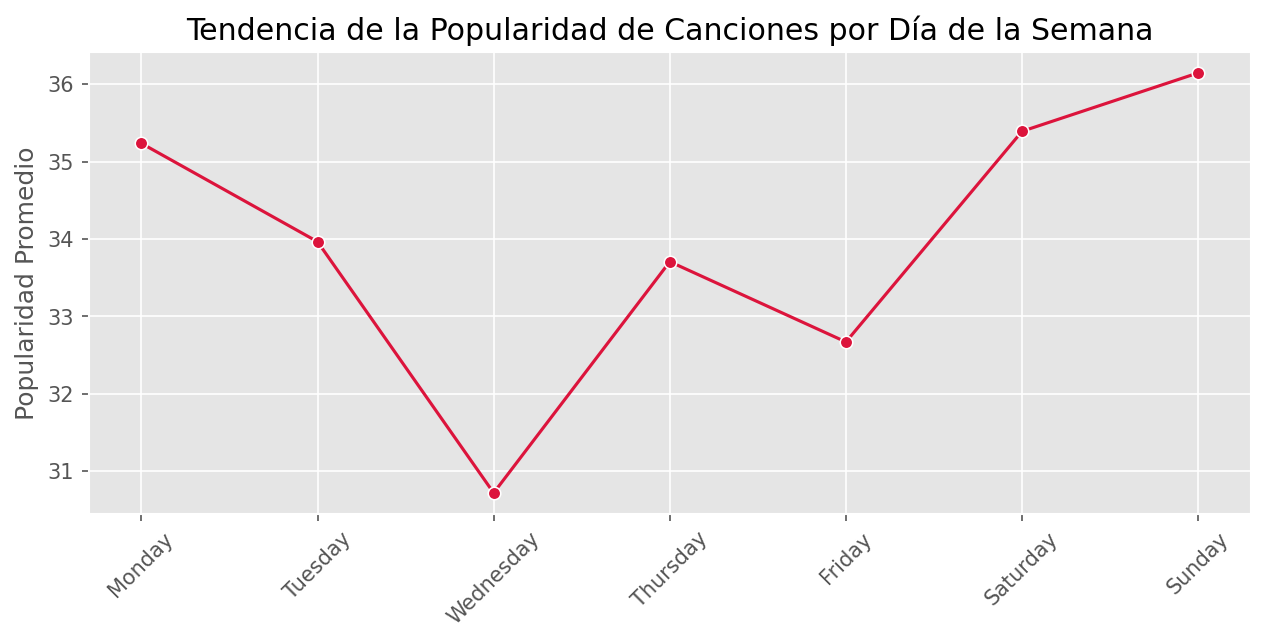

In [11]:
df_grouped = tracks_total_filtrado_aux3.groupby('day_of_week')['popularity'].mean().reset_index()

# Convertir a categoría ordenada
df_grouped["day_of_week"] = pd.Categorical(df_grouped["day_of_week"], categories=daily_counts.keys(), ordered=True)

# Ordenar antes de graficar
df_grouped = df_grouped.sort_values("day_of_week")

plt.figure(figsize=(10, 4), dpi=150)
sns.lineplot(x=df_grouped['day_of_week'], y=df_grouped['popularity'], color="crimson", marker="o")

plt.xlabel("")
plt.ylabel("Popularidad Promedio")
plt.title("Tendencia de la Popularidad de Canciones por Día de la Semana")
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-warning">

En primer lugar hay que tener en cuenta el rango de valores en los que se encuentran las popularidades medias de la gráfica, entre 31 y 36. Se trata de un rango muy pequeño muy susceptible a sesgos del propio dataset. A pesar de ello, se puede observar una tendencia general a mayor popularidad en lanzamientos realizados hacia el fin de semana.

</div>

Hago el mismo análisis que con los meses filtrando por canciones populares:

In [12]:
# Definir umbral de popularidad (ajústalo según el dataset)
popular_threshold = 70  

df_summary = filter_popularity(tracks_total_filtrado_aux3, popular_threshold, "day_of_week", daily_counts)
df_summary

day_of_week  popular_songs  total_songs  popular_percentage
1      Monday            565        12967            4.357214
5     Tuesday            696        15347            4.535088
6   Wednesday            375        13405            2.797464
4    Thursday            501        11475            4.366013
0      Friday           2301        49666            4.632948
2    Saturday            197         5526            3.564966
3      Sunday            185         4829            3.831021

C:\Users\defco\AppData\Local\Temp\ipykernel_6332\4241144642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary["day_of_week"], y=df_summary["popular_songs"], palette="coolwarm")


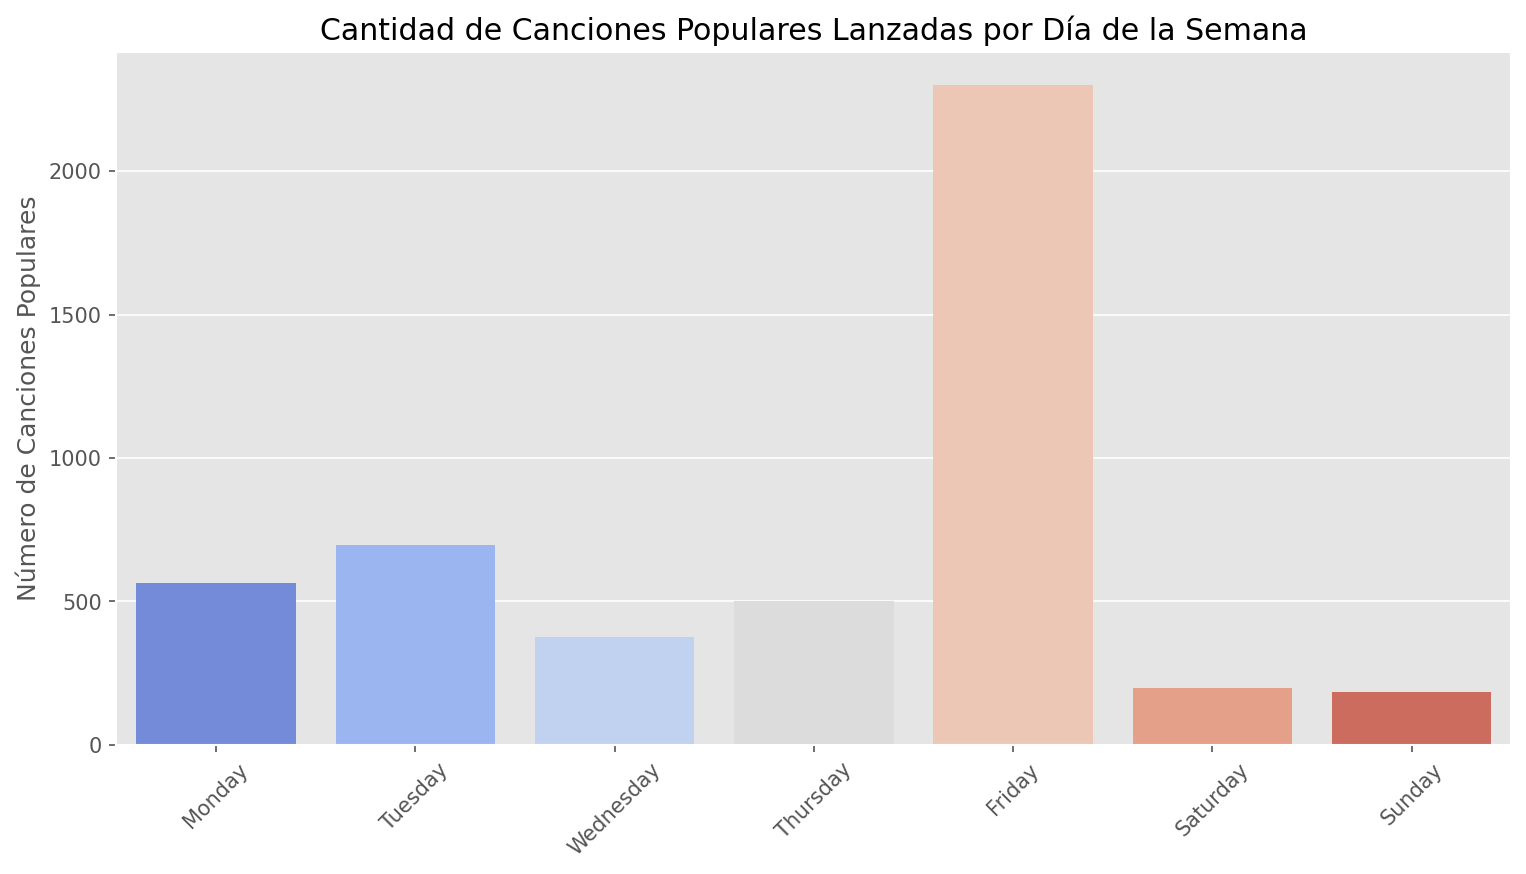

In [13]:
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(x=df_summary["day_of_week"], y=df_summary["popular_songs"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Número de Canciones Populares")
plt.title("Cantidad de Canciones Populares Lanzadas por Día de la Semana")
plt.show()

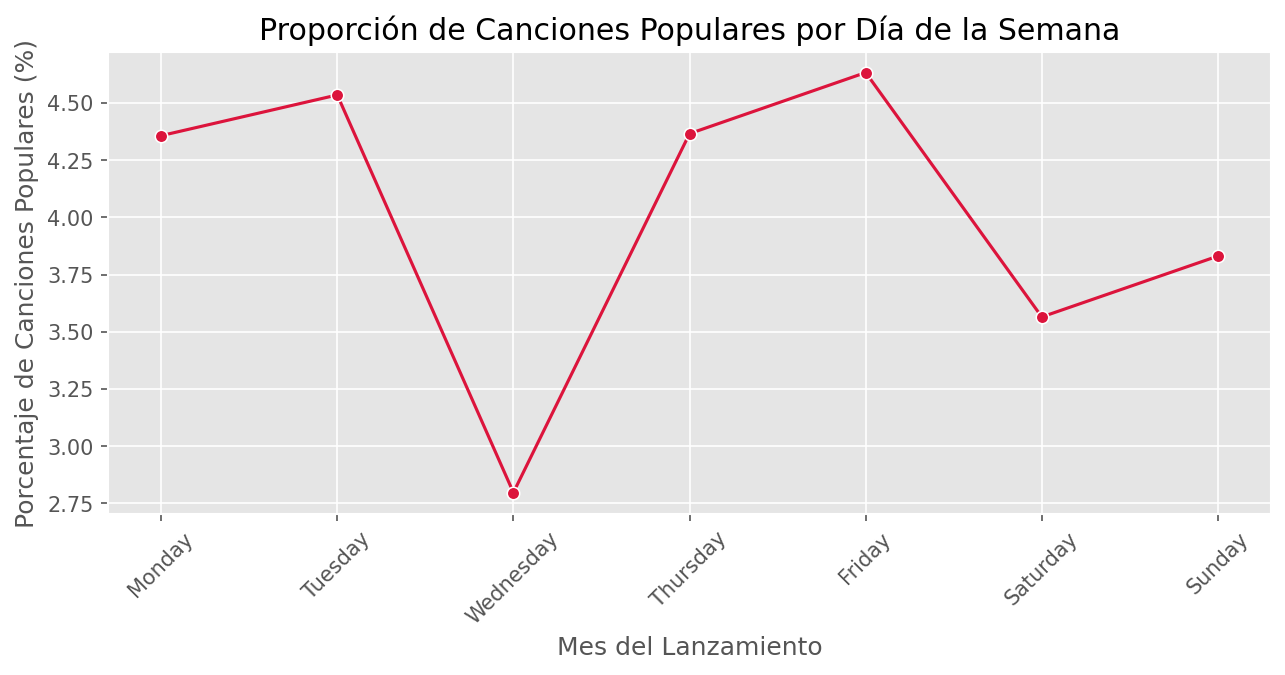

In [14]:
plt.figure(figsize=(10, 4), dpi=150)
sns.lineplot(x=df_summary["day_of_week"], y=df_summary["popular_percentage"], marker="o", color="crimson")
plt.xticks(rotation=45)
plt.xlabel("Mes del Lanzamiento")
plt.ylabel("Porcentaje de Canciones Populares (%)")
plt.title("Proporción de Canciones Populares por Día de la Semana")
plt.grid(True)
plt.show()

<div class="alert alert-success">

Al igual que en el análisis mensual, se demuestra que los lanzamientos más populares se realizan los viernes.

En conclusión, se puede inferir el éxito de una canción por su día de lanzamiento en la semana.

</div>

### ¿Triunfan más las canciones más cortas?

In [20]:
tracks_total_filtrado_aux5 = tracks_total_filtrado.copy()

In [21]:
tracks_total_filtrado_aux5 = tracks_total_filtrado_aux5[tracks_total_filtrado_aux5['track_genre'].isin(most_popular_genres_popularity[:3].keys())]

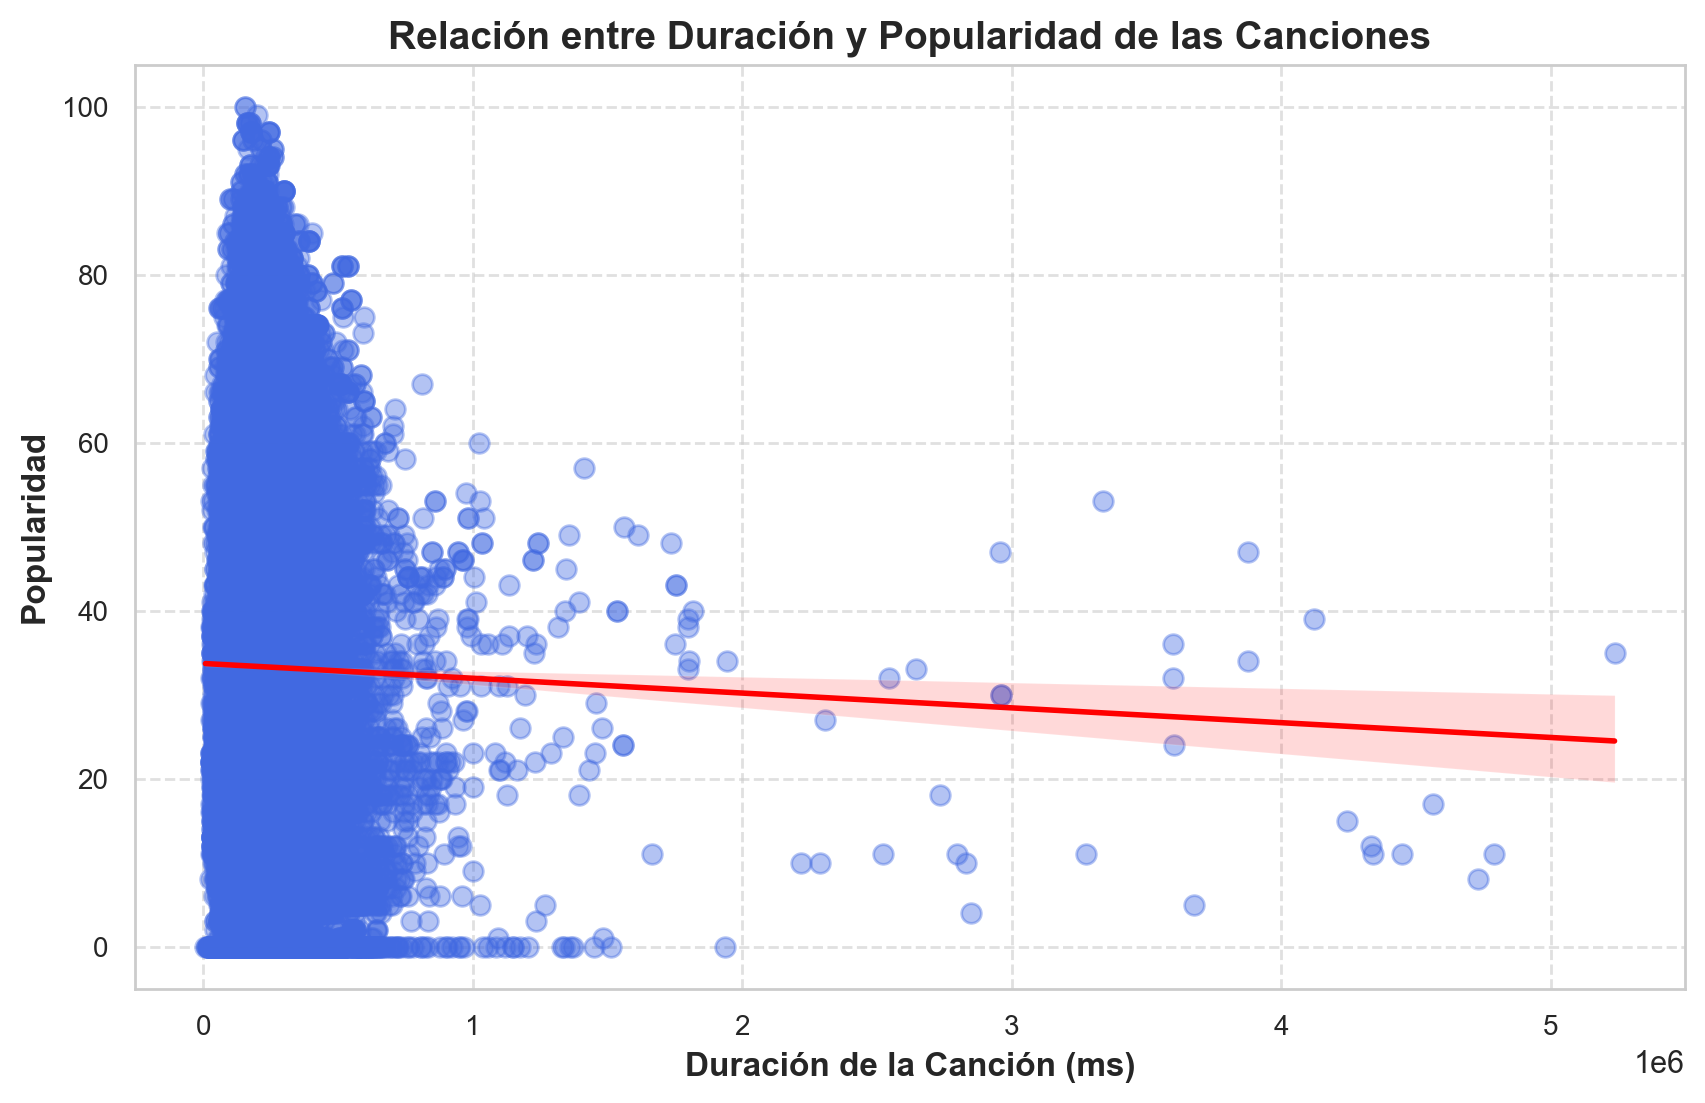

In [ ]:
sns.set_style("whitegrid")  

plt.figure(figsize=(10, 6), dpi=200)

sns.regplot(
    x=tracks_total_filtrado["duration_ms"], y=tracks_total_filtrado["popularity"], color="royalblue",  scatter_kws={"alpha": 0.4, "s": 50},
    line_kws={"color": "red", "linewidth": 2}, truncate=True, 
)

plt.xlabel("Duración de la Canción (ms)", fontsize=12, fontweight="bold")
plt.ylabel("Popularidad", fontsize=12, fontweight="bold")
plt.title("Relación entre Duración y Popularidad de las Canciones", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

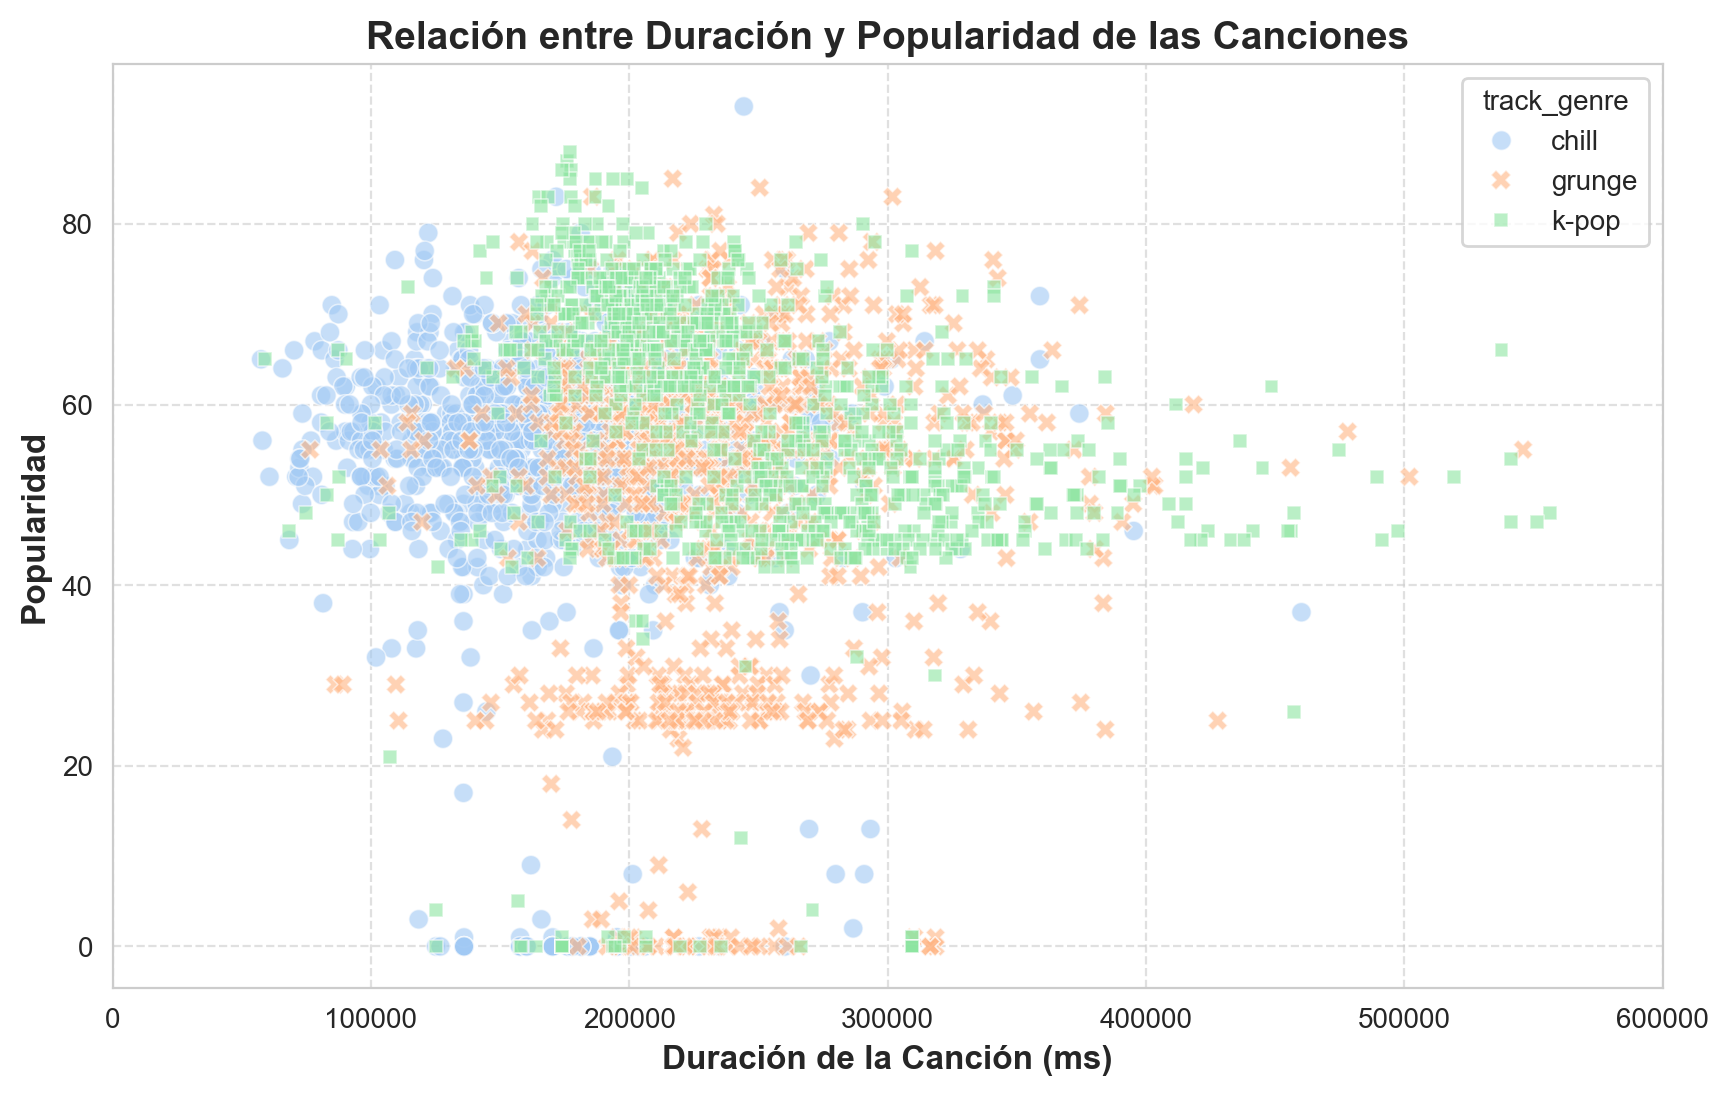

In [ ]:
sns.set_style("whitegrid")  

plt.figure(figsize=(10, 6), dpi=200)

sns.scatterplot(data=tracks_total_filtrado_aux5, x="duration_ms", y="popularity", color="royalblue", 
                alpha=0.6, s=50, hue="track_genre", style="track_genre"
                )

plt.xlabel("Duración de la Canción (ms)", fontsize=12, fontweight="bold")
plt.ylabel("Popularidad", fontsize=12, fontweight="bold")
plt.title("Relación entre Duración y Popularidad de las Canciones", fontsize=14, fontweight="bold")
plt.xlim(0, 600000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

<div class="alert alert-success">

La última gráfica sugiere que los 3 géneros más populares se acumulan principalmente en menores duraciones, lo cual es un indicativo de una posible relación entre ambas variables.

</div>

Calculo la correlación de Spearman entre 'duration_ms' y 'popularity', dado que, basándome en la gráfica anterior y en consonancia con la correlación de de Pearson **_*(-0.01)*_**, no se percibe una relación lineal entre las variables.

In [184]:
calculate_spearman(np.array(tracks_total_filtrado['duration_ms']), np.array(tracks_total_filtrado['popularity']))

Correlación de Spearman: 0.026
Valor p: 0.000


<div class="alert alert-warning">

0.026 sugiere que hay una tendencia creciente, pero es muy débil (una variable no predice bien la otra).

Valor p = 0.000 indica que la correlación es estadísticamente significativa (p < 0.05), es decir, es poco probable que haya surgido por azar.

Es decir, a pesar de mi sesgo para creer que la duración de las canciones influía directamente en la popularidad, según los datos contenidos en este dataset no existe una relación tan significativa, aunque no es una hipótesis totalmente rechazada.

Por lo tanto, canciones más cortas pueden ser populares o impopulares (no es el único factor influyente), pero más largas tienen más tendencia hacia la impopularidad. Esto es también debido a una influencia indirecta de Spotify, pues las canciones con menor duración tienen más probabilidad de obtener índices de retención mayores (los oyentes escuchan más la canción completa), lo que el algoritmo de Spotify toma como una buena señal e impulsa dicha canción.

</div>

### ¿Tienen menos probabilidad de éxito las canciones con letras explícitas?

In [ ]:
tracks_total_filtrado_aux5 = tracks_total_filtrado_aux5[tracks_total_filtrado_aux5['track_genre'].isin(most_popular_genres_popularity[:3].keys())]

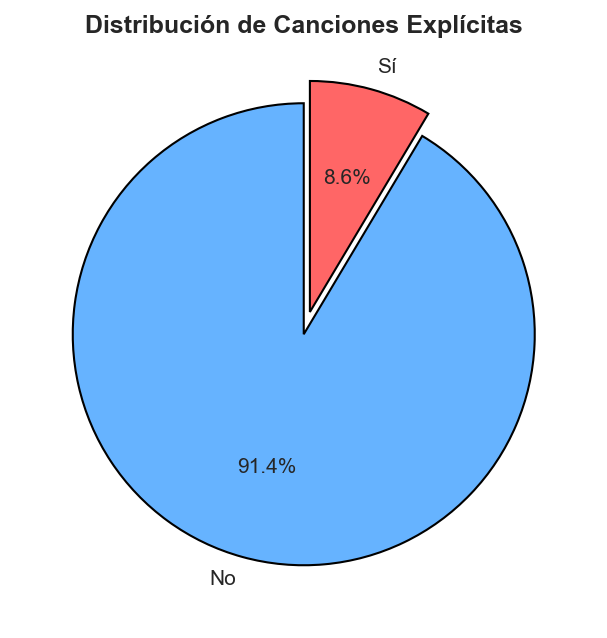

In [45]:
colors = ['#66b3ff', '#ff6666']
explode = [0, 0.1]

plt.figure(figsize=(5, 5), dpi=150)
plt.pie(
    tracks_total_filtrado['explicit'].value_counts(), labels=["No", "Sí"], autopct='%1.1f%%', 
    startangle=90, colors=colors, explode=explode, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)


plt.title("Distribución de Canciones Explícitas", fontsize=12, fontweight="bold")

plt.show()

<div class="alert alert-warning">

Como se ve en la gráfica, la mayoría de las canciones no contienen letras explícitas (por encima del 90%).

Esta tendencia puede ser atribuida a que los artistas intenten evitar contenido explícito en sus letras, no directamente por la influencia que pueda ejercer el algoritmo de Spotify en el éxito de las canciones en su plataforma, sino por factores culturales, sociales y regulatorios asociados al lanzamiento de contenido.

El contenido lanzado en Spotify está directamente relacionado con su promoción en otras plataformas como Instagram, Facebook, etc. Es sabido que, por ejemplo, Instagram penaliza la presencia de contenido explícito, por lo tanto, indirectamente los artistas pueden simplemente optar por evitar dicho contenido y con ello asegurar alcanzar una mayor audiencia.

</div>

C:\Users\defco\AppData\Local\Temp\ipykernel_15284\1977183695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tracks_total_filtrado["explicit"], y=tracks_total_filtrado["popularity"], palette=["#66b3ff", "#ff6666"], errorbar=None)


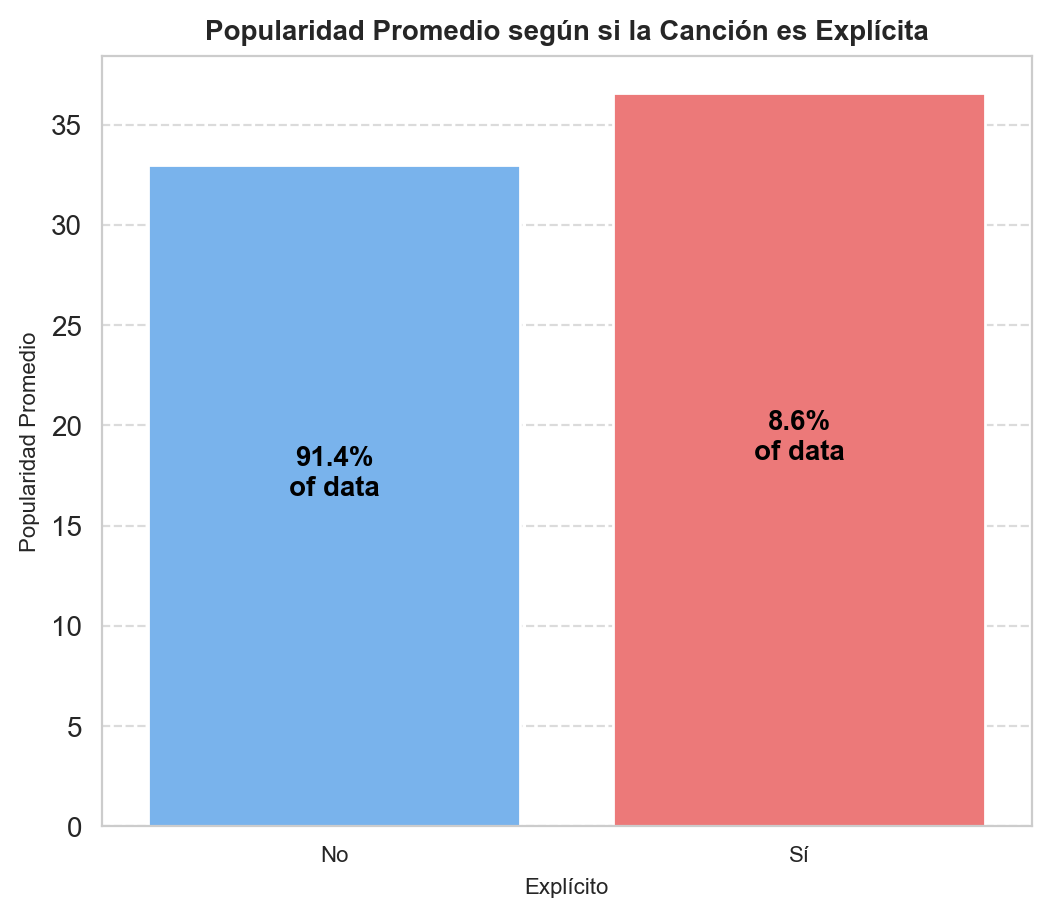

In [46]:
value_counts = tracks_total_filtrado["explicit"].value_counts(normalize=True) * 100  # % de cada categoría

# Crear la figura
plt.figure(figsize=(6, 5), dpi=200)
ax = sns.barplot(x=tracks_total_filtrado["explicit"], y=tracks_total_filtrado["popularity"], palette=["#66b3ff", "#ff6666"], errorbar=None)

# Añadir los porcentajes sobre cada barra
for i, p in enumerate(ax.patches):
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posición X centrada
        p.get_y() + p.get_height() / 2,  # Posición Y un poco arriba de la barra
        f"{value_counts[i]:.1f}%\nof data",  # Texto con el porcentaje
        ha="center", fontsize=10, fontweight="bold", color="black"
    )

# Personalización
plt.xlabel("Explícito", fontsize=8)
plt.xticks([0, 1], ["No", "Sí"], fontsize=8)
plt.ylabel("Popularidad Promedio", fontsize=8)
plt.title("Popularidad Promedio según si la Canción es Explícita", fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

<div class="alert alert-danger">

Las canciones explícitas parecieran tener más popularidad, pero no se puede asegurar debido al desequilibrio de canciones existentes en el dataset.

</div>

Lo analizo con los 3 géneros más populares:

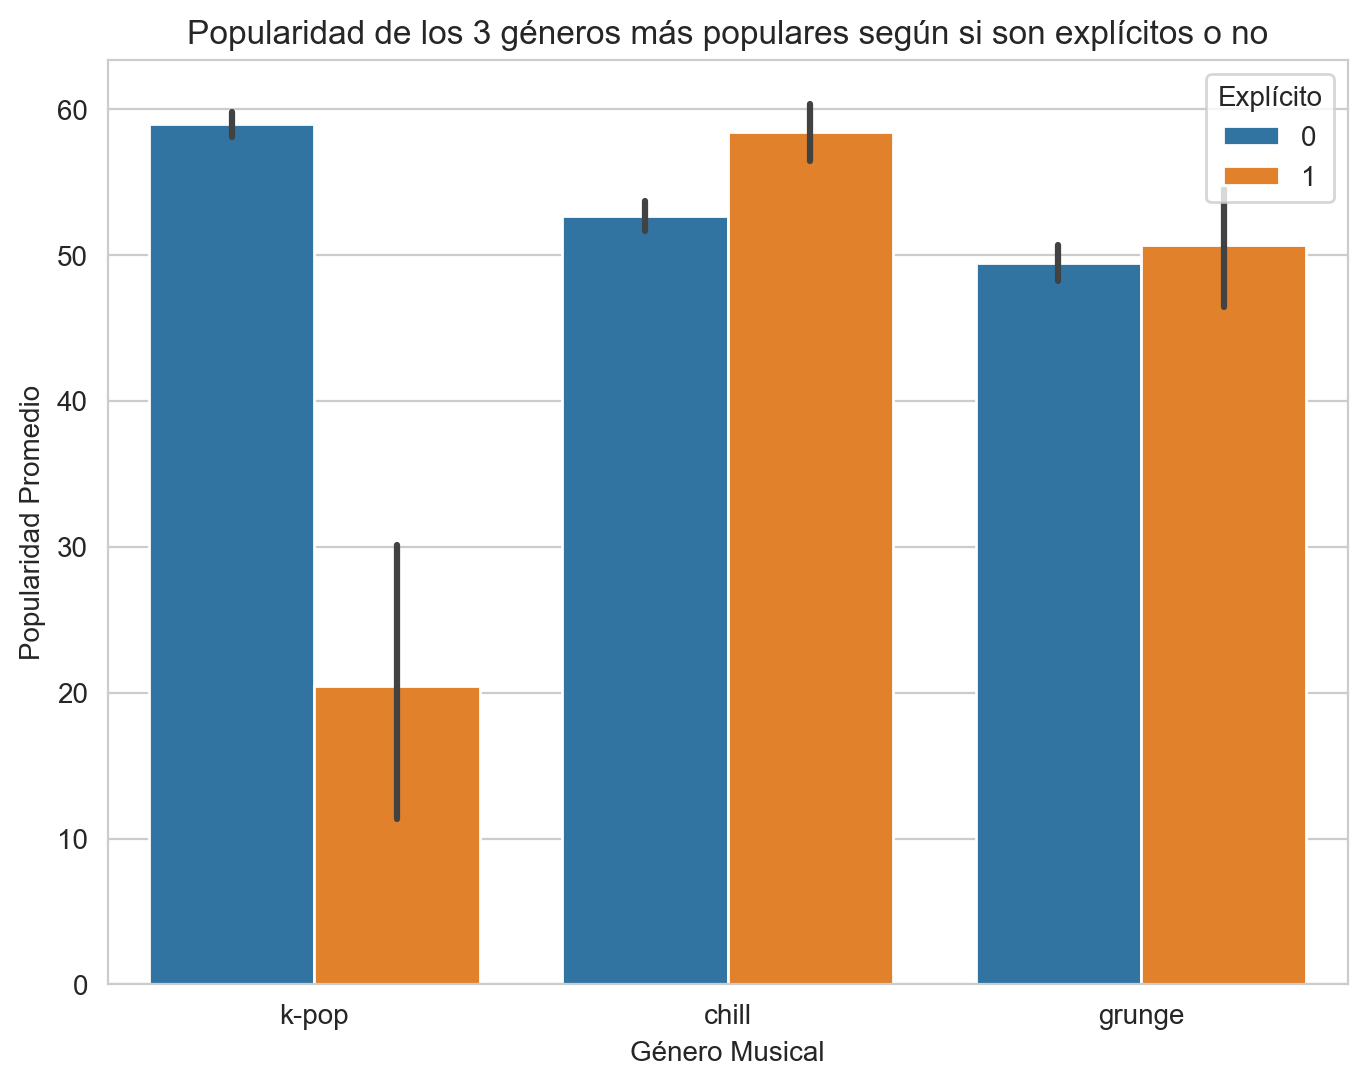

In [50]:
plt.figure(figsize=(8, 6), dpi=200)
sns.barplot(x='track_genre', y='popularity', hue='explicit', data=tracks_total_filtrado_aux5, 
            palette=['#1f77b4', '#ff7f0e'], order=['k-pop', 'chill', 'grunge'])

plt.xlabel('Género Musical')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad de los 3 géneros más populares según si son explícitos o no')
plt.legend(title='Explícito', loc='upper right')

plt.show()

<div class="alert alert-danger">

Analizando los 3 géneros más populares se observa que k-pop, el más popular, sí que tiene una mayor cantidad de canciones no explícitas, pero no se puede interpretar directamente como influyente en el éxito de las canciones debido al efecto del algoritmo de Spotify. Puede simplemente deberse a razones sociales, por ejemplo, que en la música koreana haya menos tendencia a escribir canciones explícitas.

</div>

### ¿Ayudan la colaboraciones a impulsar un lanzamiento?

C:\Users\defco\AppData\Local\Temp\ipykernel_15284\3440385576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tracks_total_filtrado["colab"], y=tracks_total_filtrado["popularity"], palette=["#66b3ff", "#ff6666"], errorbar=None)


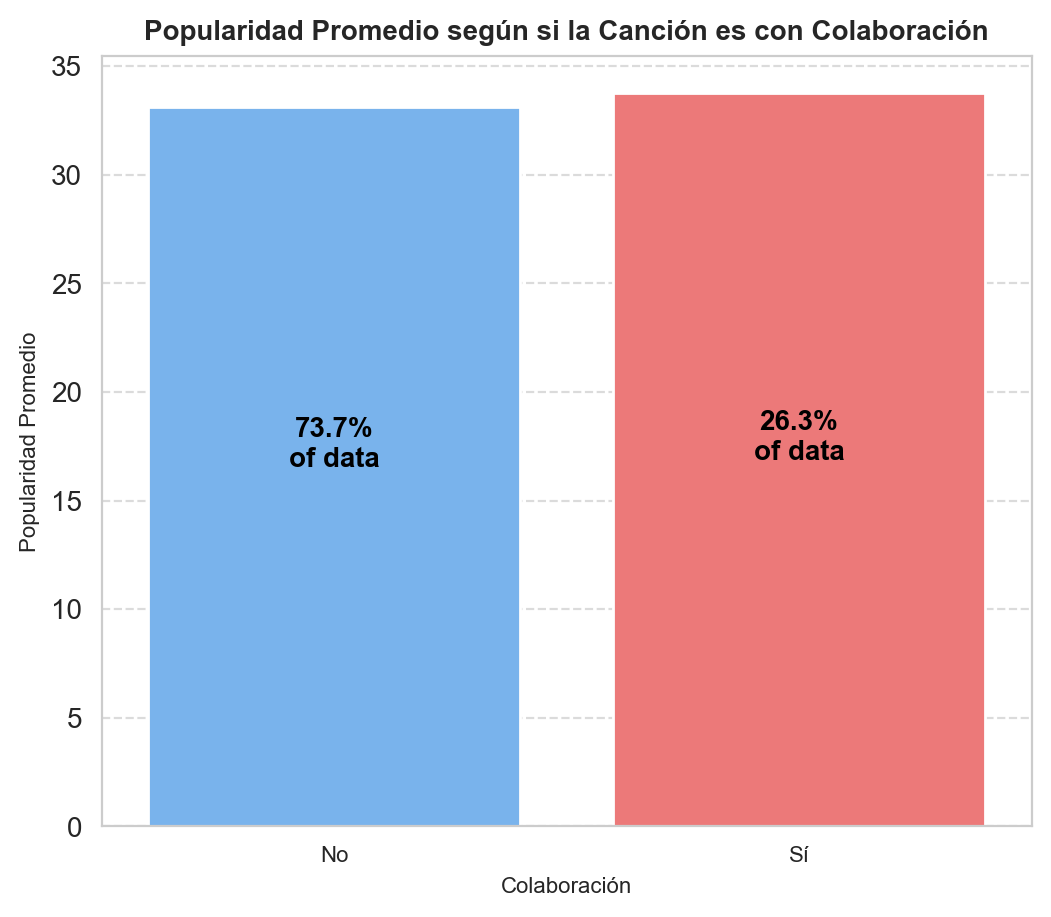

In [52]:
value_counts = tracks_total_filtrado["colab"].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 5), dpi=200)
ax = sns.barplot(x=tracks_total_filtrado["colab"], y=tracks_total_filtrado["popularity"], palette=["#66b3ff", "#ff6666"], errorbar=None)

# Añadir los porcentajes sobre cada barra
for i, p in enumerate(ax.patches):
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posición X centrada
        p.get_y() + p.get_height() / 2,  # Posición Y un poco arriba de la barra
        f"{value_counts[i]:.1f}%\nof data",  # Texto con el porcentaje
        ha="center", fontsize=10, fontweight="bold", color="black"
    )

plt.xticks([0, 1], ["No", "Sí"], fontsize=8)
plt.xlabel("Colaboración", fontsize=8)
plt.ylabel("Popularidad Promedio", fontsize=8)
plt.title("Popularidad Promedio según si la Canción es con Colaboración", fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

<div class="alert alert-warning">

Las canciones con colaboración parecieran tener ligeramente más popularidad, pero no se puede asegurar debido al desequilibrio de canciones existentes en el dataset.

</div>

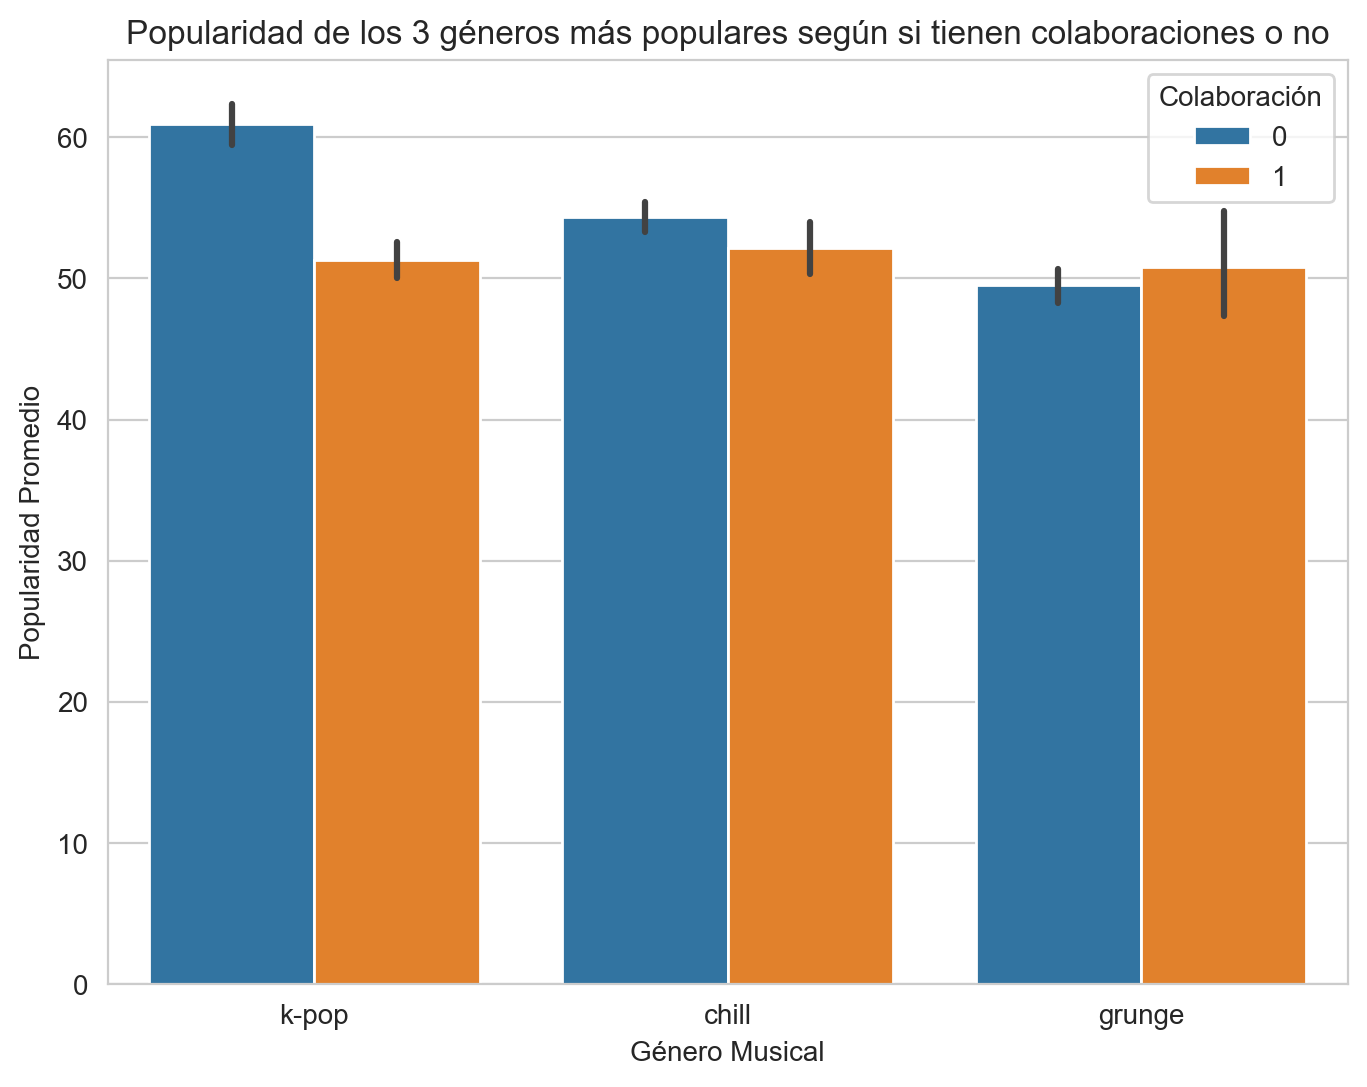

In [54]:
plt.figure(figsize=(8, 6), dpi=200)
sns.barplot(x='track_genre', y='popularity', hue='colab', data=tracks_total_filtrado_aux5, 
            palette=['#1f77b4', '#ff7f0e'], order=['k-pop', 'chill', 'grunge'])

plt.xlabel('Género Musical')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad de los 3 géneros más populares según si tienen colaboraciones o no')
plt.legend(title='Colaboración', loc='upper right')

plt.show()

### ¿Es útil realizar una campaña de lanzamiento por singles?

In [189]:
tracks_total_filtrado_aux4 = tracks_total_filtrado.copy()

In [193]:
# Crear la columna 'has_singles' si un álbum tiene canciones con fechas de lanzamiento diferentes
tracks_total_filtrado_aux4["has_singles"] = tracks_total_filtrado_aux4.groupby("album_name")["release_date"].transform(lambda x: x.nunique() > 1)

# Clasificar artistas como emergentes o consagrados usando un umbral de seguidores
followers_threshold = 10000
tracks_total_filtrado_aux4["artist_category"] = tracks_total_filtrado_aux4["followers"].apply(lambda x: "Emergente" if x < followers_threshold else "Consolidado")

# Calcular la popularidad promedio por álbum
df_album_popularity = tracks_total_filtrado_aux4.groupby(["album_name", "has_singles", "artist_category"])["popularity"].mean().reset_index()

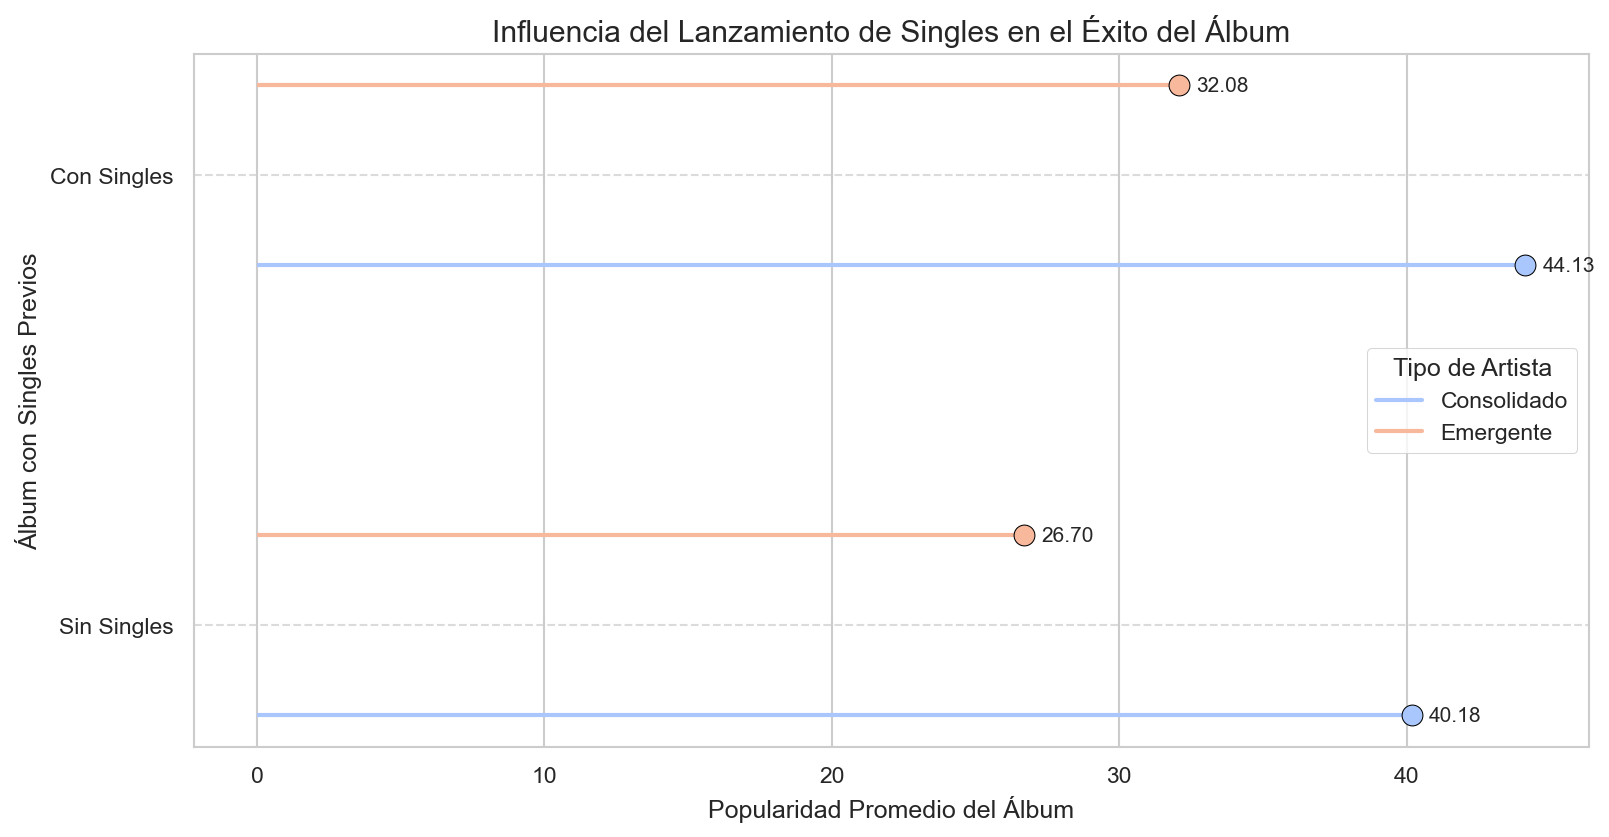

In [ ]:
from matplotlib.lines import Line2D

sns.set_style("whitegrid")  

# Crear una figura
plt.figure(figsize=(12, 6), dpi=150)

offset = 0.2  # Reduce la separación entre las categorías
colors = sns.color_palette("coolwarm", 2).as_hex()  # Convertimos los colores a formato hexadecimal

legend_lines = []  # Lista para la leyenda

# Ploteo de las líneas horizontales (hlines)
for i, category in enumerate(df_album_popularity['artist_category'].unique()):
    subset = df_album_popularity[df_album_popularity['artist_category'] == category]
    color = colors[i]  # Asignar color basado en la categoría
    
    for has_singles in [0, 1]:
        subset_single = subset[subset['has_singles'] == has_singles]
        y_pos = has_singles + (offset if category == 'Emergente' else -offset)  # Ajustar para visualización
        mean_popularity = subset_single['popularity'].mean()
        
        # Dibujar la línea horizontal
        plt.hlines(y_pos, xmin=0, xmax=mean_popularity, color=color, linewidth=2)
        plt.scatter(mean_popularity, y_pos, color=color, s=100, edgecolor='black', zorder=5)

        # Anotaciones
        plt.text(mean_popularity + 0.6, y_pos, f'{mean_popularity:.2f}', va='center', ha='left', fontsize=10)
    
    # Agregar línea a la leyenda
    legend_lines.append(Line2D([0], [0], color=color, linewidth=2, label=category))

# Mejorar etiquetas y diseño
plt.yticks([0, 1], ["Sin Singles", "Con Singles"])
plt.xlabel("Popularidad Promedio del Álbum")
plt.ylabel("Álbum con Singles Previos")
plt.title("Influencia del Lanzamiento de Singles en el Éxito del Álbum")
plt.legend(handles=legend_lines, title="Tipo de Artista", loc='center right')
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<div class="alert alert-success">

Se observa un aumento de la popularidad en aquellos álbumes cuya estrategia de lanzamiento fue por singles, es decir, previo al lanzamiento del álbum se lanzaron una serie de canciones del mismo y se promocionaron individualmente.

</div>

### ¿Influye la felicidad en la popularidad de una canción?

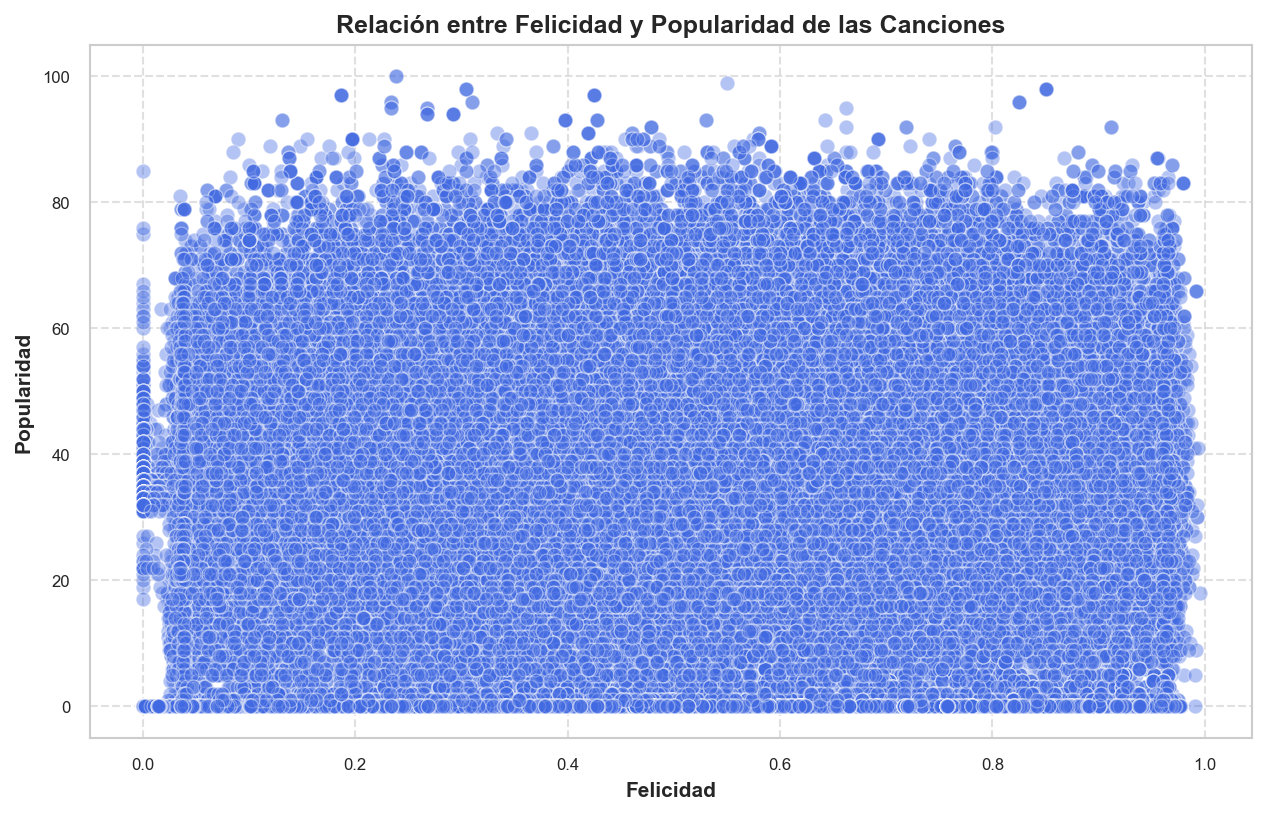

In [196]:
sns.set_style("whitegrid")  
sns.set_palette("pastel")  

# Crear figura
plt.figure(figsize=(10, 6), dpi=150)

# Graficar regresión
sns.scatterplot(
    x=tracks_total_filtrado["valence"], 
    y=tracks_total_filtrado["popularity"], 
    color="royalblue",  
    alpha= 0.4, s= 50,  # Transparencia y tamaño de los puntos
)

# Personalizar etiquetas y título
plt.xlabel("Felicidad", fontsize=10, fontweight="bold")
plt.ylabel("Popularidad", fontsize=10, fontweight="bold")
plt.title("Relación entre Felicidad y Popularidad de las Canciones", fontsize=12, fontweight="bold")

# Ajustar ejes para mejor visualización
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)  # Líneas de la cuadrícula más suaves

# Mostrar gráfico
plt.show()

<div class="alert alert-danger">

No existe una influencia, los datos están equitativamente dispersos.

</div>